# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
data = pd.read_csv("stock_data.csv")

## Data Overview

- Observations
- Sanity checks

#### View the first and last 5 rows of the dataset.

In [3]:
# View the first 5 rows of the dataset
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [4]:
# View the last 5 rows of the dataset
data.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

**Observations**

*   The Net cash flow of few companies such as Adobe Systems Inc, American Airlines group, Yahoo Inc, Zions Bancorp are negative meaning the cash outflow is more than the cash Inflow.
*   The current stock price of the Zimmer Biomet Holdings is highest with 102 dollars followed by Adobe Systems Inc with a stock price of 93 dollars.
*   The Earnings per share of the Yahoo Inc is negative which is reflected on their Net Income as well to be negative.
*   American Airlines group yields the highest Earnings per share of $11.








#### Shape of the Dataset

In [5]:
# View the shape of the dataset
data.shape

(340, 15)

There are 340 rows and 15 columns in the stock dataset.

#### Datatypes of the Columns of the Dataset

In [6]:
# check the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

There are four columns which are of type Object. Rest of the 11 columns are numeric in nature.

#### Missing value check

In [7]:
# Check if there are any missing values in the dataset
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There are no missing values in the Stock dataset.

#### Duplicate value check

In [8]:
# check if any duplicate rows are present in the dataset
data.duplicated().sum()

0

There are no duplicate values in the Stock dataset.

#### Statistical Summary of the variables

In [9]:
# check the statistical summary of the variables
data.describe().T

count          mean           std           min  \
Current Price                 340.0  8.086234e+01  9.805509e+01  4.500000e+00   
Price Change                  340.0  4.078194e+00  1.200634e+01 -4.712969e+01   
Volatility                    340.0  1.525976e+00  5.917984e-01  7.331632e-01   
ROE                           340.0  3.959706e+01  9.654754e+01  1.000000e+00   
Cash Ratio                    340.0  7.002353e+01  9.042133e+01  0.000000e+00   
Net Cash Flow                 340.0  5.553762e+07  1.946365e+09 -1.120800e+10   
Net Income                    340.0  1.494385e+09  3.940150e+09 -2.352800e+10   
Earnings Per Share            340.0  2.776662e+00  6.587779e+00 -6.120000e+01   
Estimated Shares Outstanding  340.0  5.770283e+08  8.458496e+08  2.767216e+07   
P/E Ratio                     340.0  3.261256e+01  4.434873e+01  2.935451e+00   
P/B Ratio                     340.0 -1.718249e+00  1.396691e+01 -7.611908e+01   

                                       25%           50%           75%  \
Current Price                 3.855500e+01  5.970500e+01  9.288000e+01   
Price Change                 -9.394838e-01  4.819505e+00  1.069549e+01   
Volatility                    1.134878e+00  1.385593e+00  1.695549e+00   
ROE                           9.750000e+00  1.500000e+01  2.700000e+01   
Cash Ratio                    1.800000e+01  4.700000e+01  9.900000e+01   
Net Cash Flow                -1.939065e+08  2.098000e+06  1.698108e+08   
Net Income                    3.523012e+08  7.073360e+08  1.899000e+09   
Earnings Per Share            1.557500e+00  2.895000e+00  4.620000e+00   
Estimated Shares Outstanding  1.588482e+08  3.096751e+08  5.731175e+08   
P/E Ratio                     1.504465e+01  2.081988e+01  3.176476e+01   
P/B Ratio                    -4.352056e+00 -1.067170e+00  3.917066e+00   

                                       max  
Current Price                 1.274950e+03  
Price Change                  5.505168e+01  
Volatility                    4.580042e+00  
ROE                           9.170000e+02  
Cash Ratio                    9.580000e+02  
Net Cash Flow                 2.076400e+10  
Net Income                    2.444200e+10  
Earnings Per Share            5.009000e+01  
Estimated Shares Outstanding  6.159292e+09  
P/E Ratio                     5.280391e+02  
P/B Ratio                     1.290646e+02

**Observations**

*   The maximum value of the current stock price is around 1274 dollars whereas the minimum is around 4.5 dollars. The mean price of the stocks is 80 dollars.
*   About 50% of the stocks are sold for less than 59 dollars in the given Stock dataset.
*   The mean volatility is around 1.5 dollars meaning there isn't a significant variation in the price for 13 weeks.
*   There are companies with net income of 244 billion dollars.
*   The maximum Earnings per share in the listed companies is 50 dollars compared to a minimum of -61 dollars. The median Earnings Per Share of the companies listed in the dataset is around 2.9 dollars.
*   The P/E ratio of 50% of the companies in the Stock dataset is less than 20 dollars meaning 50% of the companies listed in the dataset is performing well.







In [10]:
# check the statistical summary of the categorical variables
data.describe(include="object").T

count unique                                 top freq
Ticker Symbol       340    340                                 AAL    1
Security            340    340             American Airlines Group    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

**Observations**

*   There are 11 GICS Sector in the dataset meaning 11 different industry sectors the listed companies belong to in the given dataset. Among those 53 companies belong to the Industrials sector.
*   There are 104 GICS Sub Industry with around 16 companies belong to the Oil & Gas Exploration & Production.



#### Copying the original dataset to a new dataframe

In [11]:
# copy the Stock dataset to a new dataframe
df = data.copy()

The original Stock dataset is copied to a new dataframe to perform data manipulations.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

Lets define the below functions to perform the Univariate analysis.

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Current Price

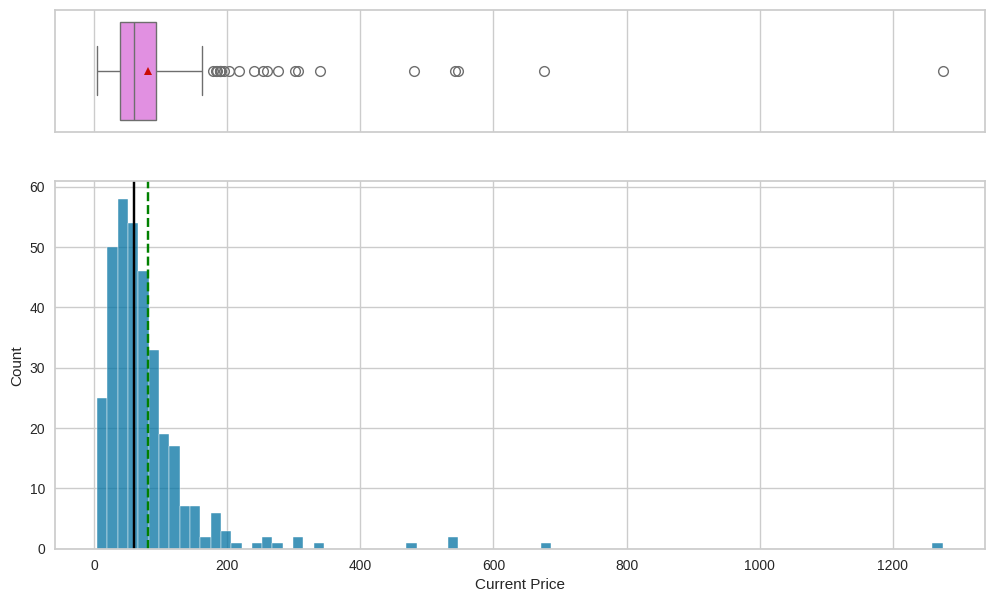

In [ ]:
# Visualize the Histogram Boxplot for Current Price attribute
histogram_boxplot(df, "Current Price")

**Observations**

*   The mean Current Price of the stocks is around 80 dollars and the median stock price is 60 dollars.
*   The distribution of the Current Price is right skewed with some outliers on the right.



#### Price Change

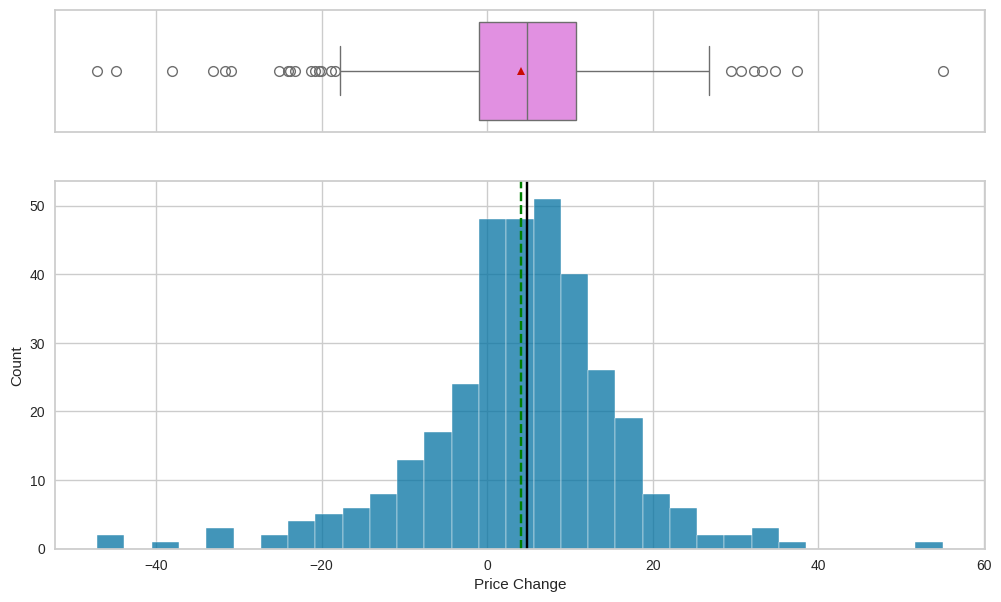

In [ ]:
# Visualize the Histogram Boxplot for Price Change attribute
histogram_boxplot(df, "Price Change")

**Observations**

*   The distribution of the Price Change attribute looks closer to a normal distribution as the mean and median are closer to each other at the value of 5 percentage.
*   There are few outliers on both the sides of the distribution.



#### Volatility

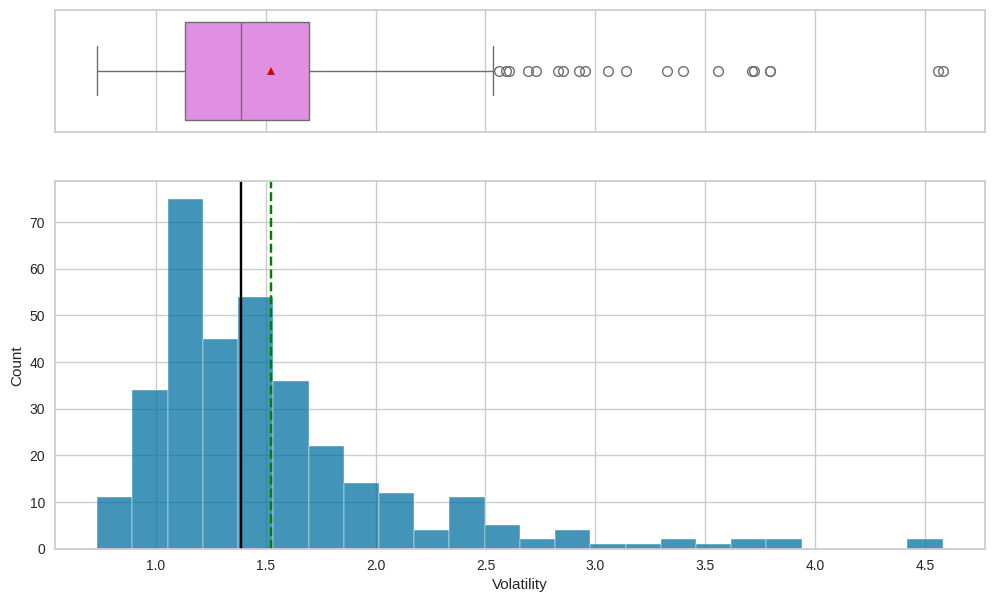

In [ ]:
# Visualize the Histogram Boxplot for Volatility attribute
histogram_boxplot(df, "Volatility")

**Observations**

*   The distribution of the Volatility attribute is more right skewed distribution with outliers on the right side.
*   The mean and median value of the volatility attribute is 1.5 dollars and 1.4 dollars respectively.
*   75% of the companies listed in the dataset has a volatility of less than 1.6 dollars.






#### ROE

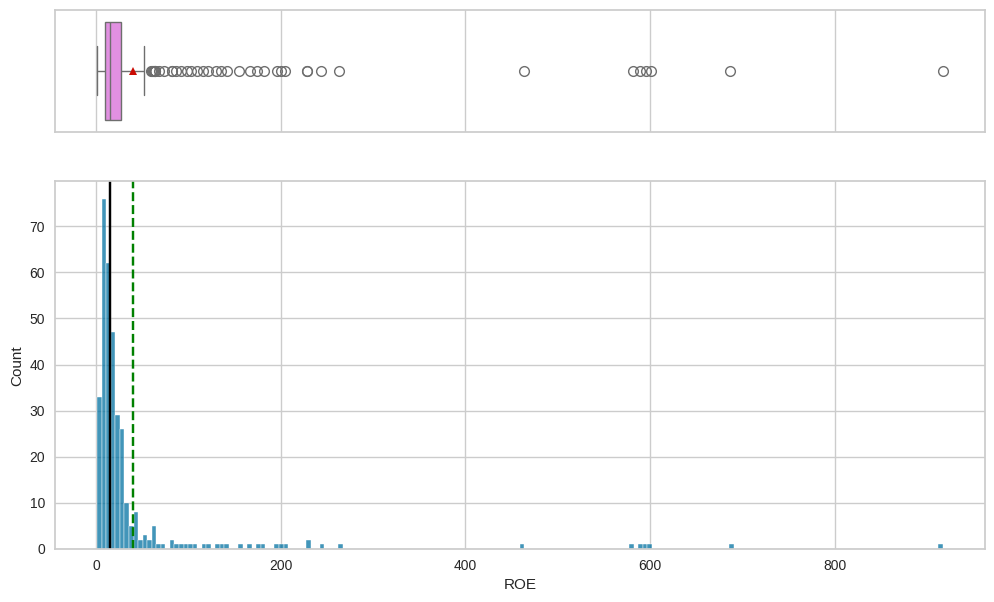

In [ ]:
# Visualize the Histogram Boxplot for ROE attribute
histogram_boxplot(df, "ROE")

**Observations**

*   The distribution of the ROE attribute is right skewed with many outliers on the right.
*   The mean Financial performance measure, ROE of the companies is close to 39 dollars. The median value is closer to the left whisker and it is 15 dollars meaning 50% of the comapnies listed has a Financial performance measure of less than 15 dollars.
*   Only 25% of the companies has a higher Finacial perfromance measure of more than 27 dollars.





#### Cash Ratio

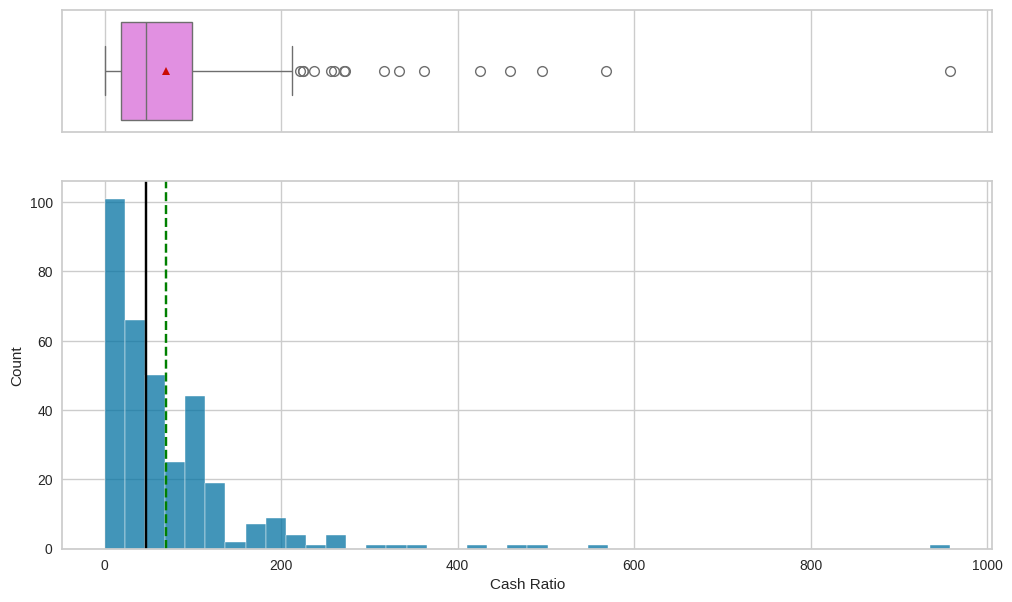

In [ ]:
# Visualize the Histogram Boxplot for Cash Ratio attribute
histogram_boxplot(df, "Cash Ratio")

**Observations**

*   The median cash ratio of 50% of the companies in the dataset is less than 47 dollars.
*   The distribution of the cash ratio is skewed to the right, meaning more than 50% of the companies in the dataset maintain a good cah ratio with some companies has around 900 dollars of cash ratio.



#### Net Cash Flow

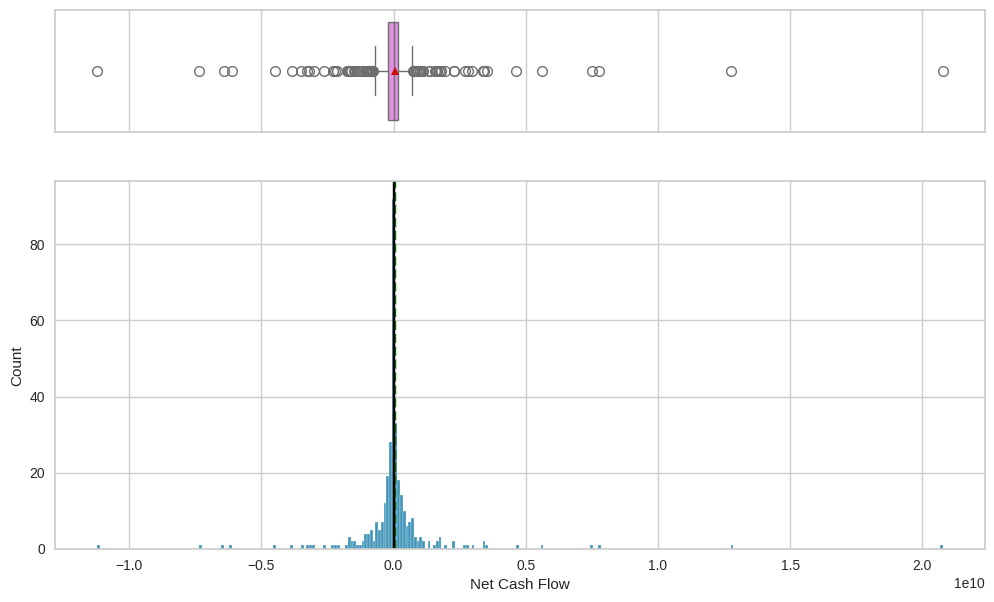

In [ ]:
# Visualize the Histogram Boxplot for Net Cash Flow attribute
histogram_boxplot(df, "Net Cash Flow")

**Observations**

*   The distribution of the net cash flow seems to be a normal distribution.
*   There are some outliers on both sides of the whiskers.



#### Net Income

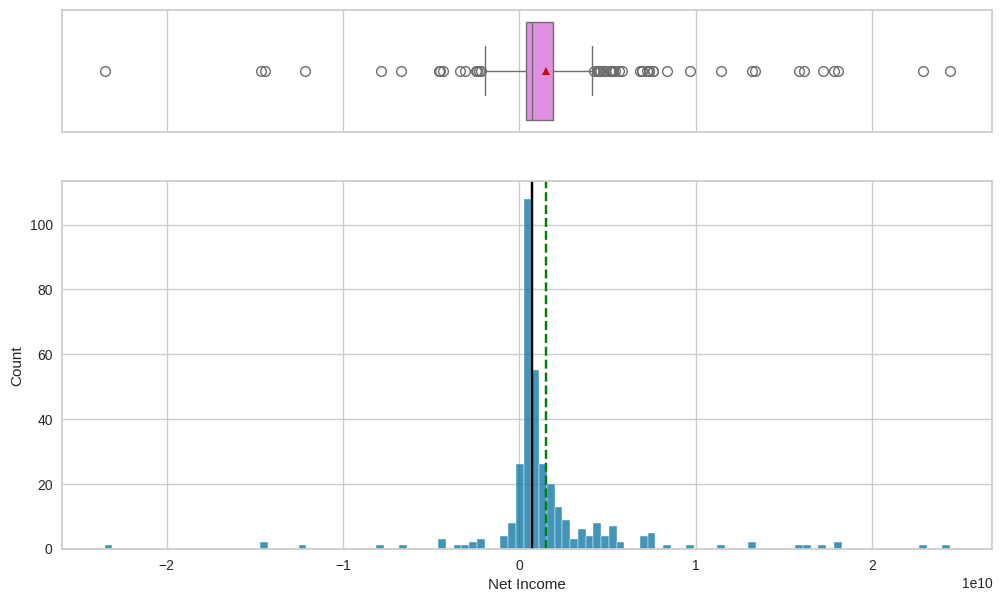

In [ ]:
# Visualize the Histogram Boxplot for Net Income attribute
histogram_boxplot(df, "Net Income")

**Observations**

*   The distributuon of Net Income is closer to a normal distribution.
*   There are some outliers on both sides of the whiskers.
*   The median value of the Net Income column is around 70 million dollars. Hence around 50% of the companies in the dataset has a really good Net Income.






#### Earnings Per Share

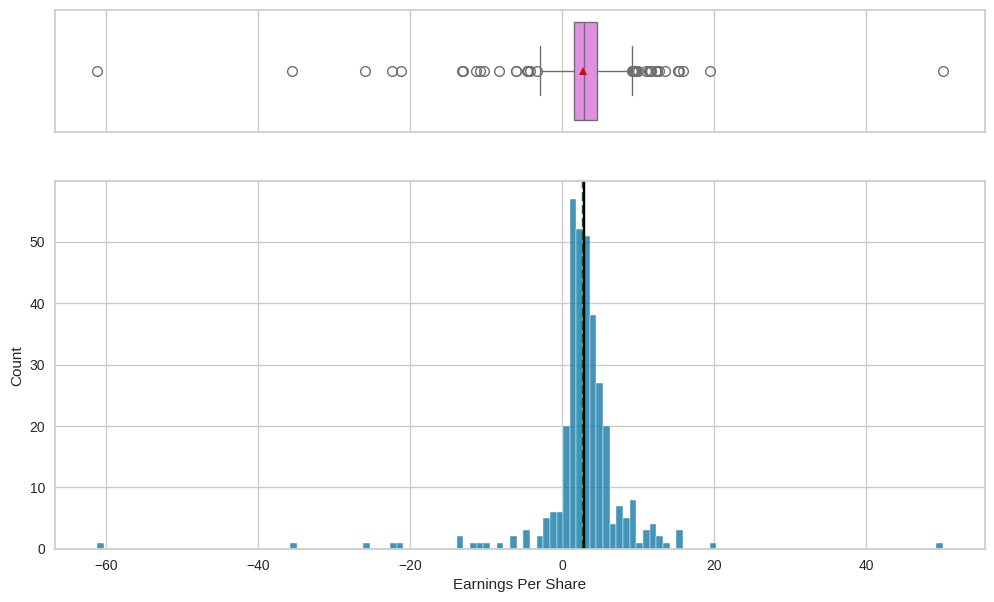

In [ ]:
# Visualize the Histogram Boxplot for Earnings Per Share attribute
histogram_boxplot(df, "Earnings Per Share")

**Observations**

*   The distribution of the Earnings per share is a normal distribution.
*   The mean value of the Earnings per share of the companies in the dataset is around 3 dollars.



#### Estimated Shares Outstanding

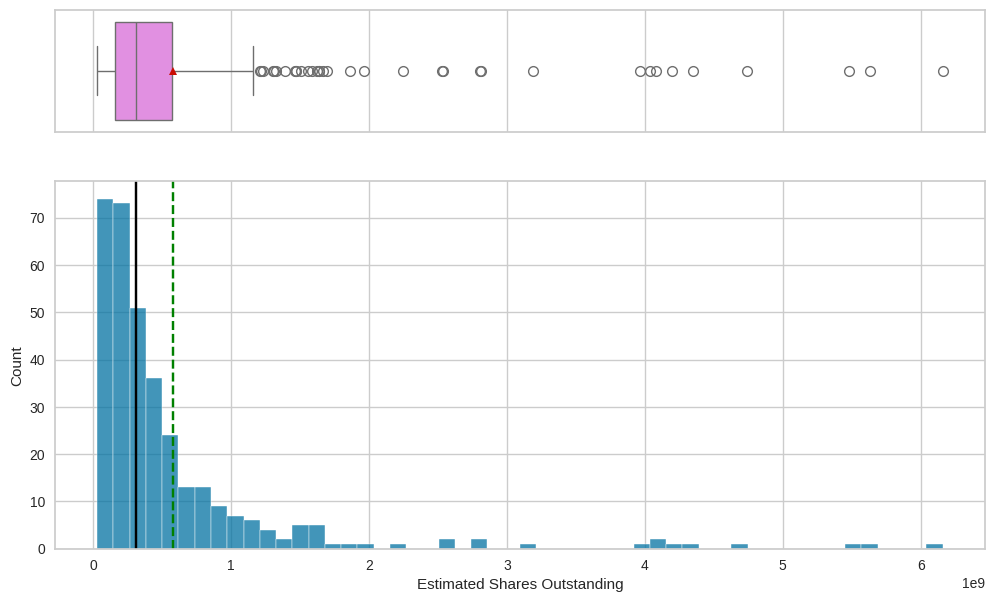

In [ ]:
# Visualize the Histogram Boxplot for Estimated Shares Outstanding attribute
histogram_boxplot(df, "Estimated Shares Outstanding")

**Observations**

*   The distribution of the estimated shares outstanding is right skewed.
*   Only 50% of the companies (170 companies) has less than 30 million outstanding shares.The rest of the 50% of the companies has more than 30 million shares bought by the Investors. Some companies has more than 60 million outstanding shares.



#### P/E Ratio

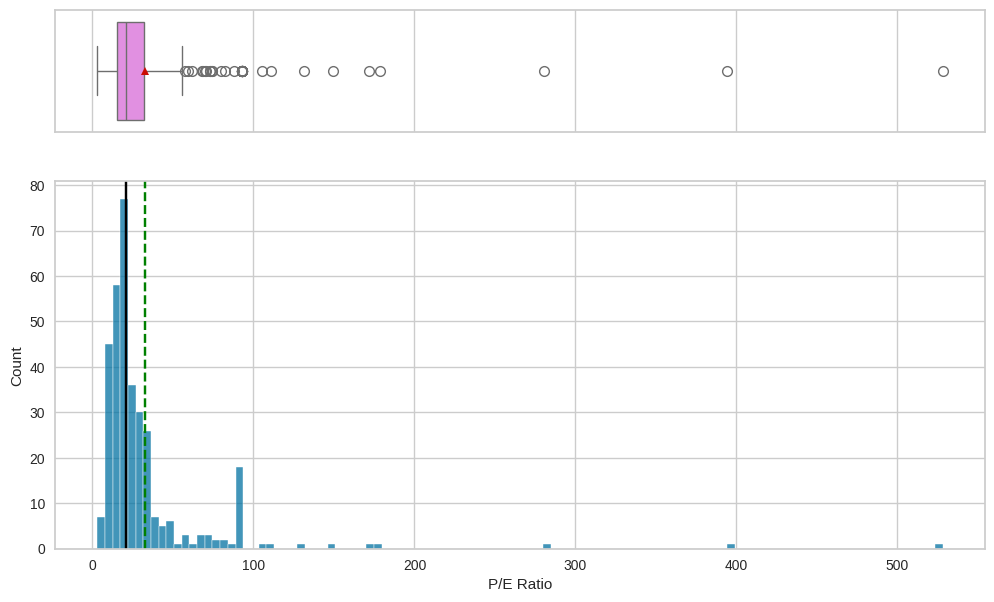

In [ ]:
# Visualize the Histogram Boxplot for P/E Ratio attribute
histogram_boxplot(df, "P/E Ratio")

**Observations**

*   The distribution of the P/E ratio seems to a right skewed distribution. There are more outliers on the right side of the whisker.
*   The mean P/E ratio is around 33 dollars. Less than 50% of the companies has a P/E ratio of 20 dollars and it is really good.



#### P/B Ratio

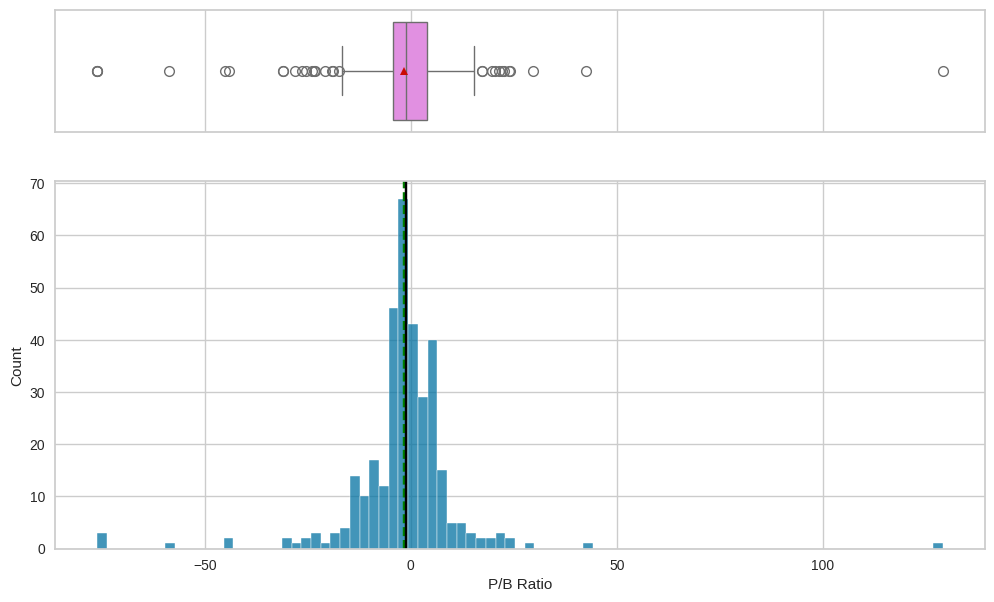

In [ ]:
# Visualize the Histogram Boxplot for P/B Ratio attribute
histogram_boxplot(df, "P/B Ratio")

**Observations**

*   The distribution of the P/B ratio is a normal distrbution with few outliers on both sides of the distribution.
*   The mean value and the median Price to the book value ratio is close to -1 which is really good as the P/B ratio less than 1 is always preferred by value investors since the stock price is not overvalued compared to the companies assets.



#### GICS Sector

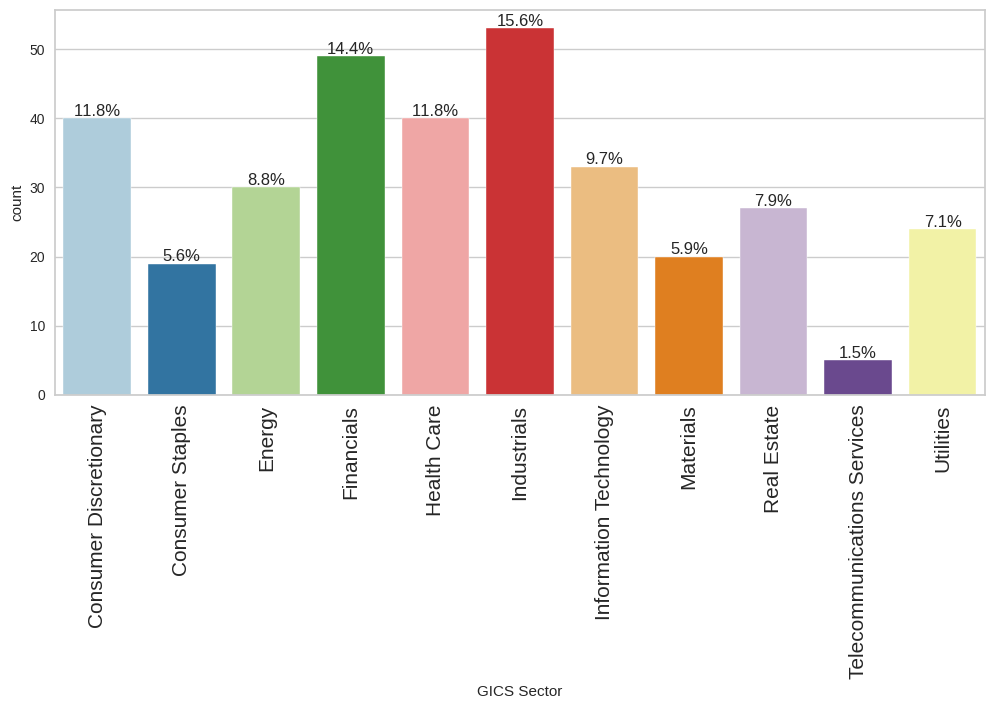

In [ ]:
# Visualize the Labeled Barlot for GICS Sector attribute
labeled_barplot(df, 'GICS Sector', perc=True)

**Observations**

*   There are 11 unique GICS sectors in the stock dataset.
*   The Industrials sector holds the highest position with 15.6% of the comapnies falling under them followed by Finacials and Consumer Discretionary.



#### GICS Sub Industry

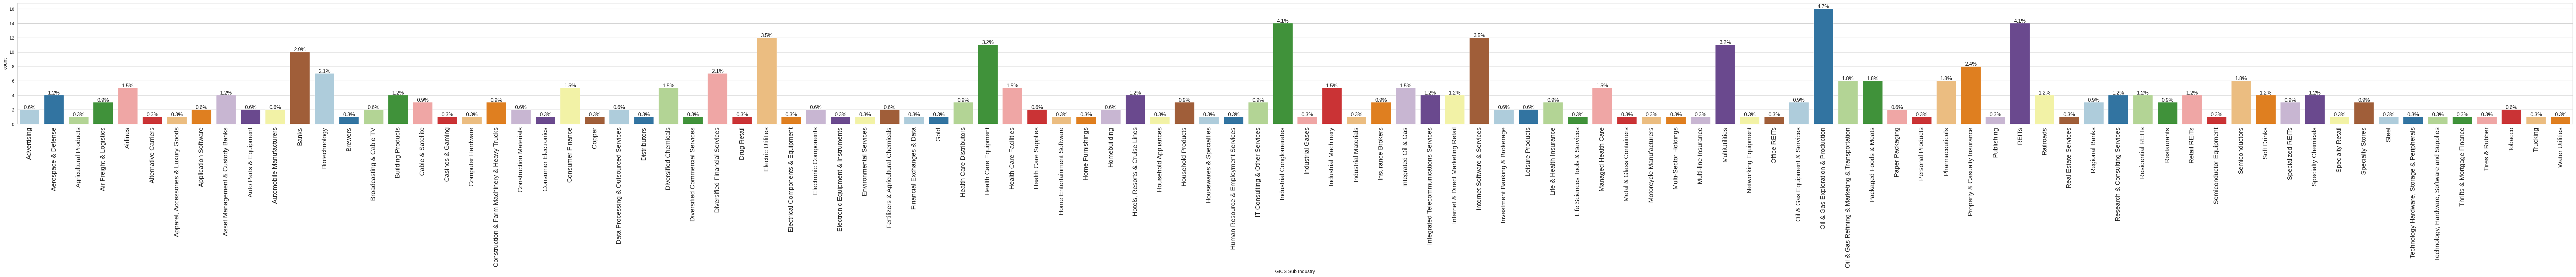

In [ ]:
# Visualize the Labeled Barlot for GICS Sub Industry attribute
labeled_barplot(df, 'GICS Sub Industry', perc=True)

**Observations**

*   There are 104 GICS Sub Industry in the Stock dataset.
*   The Oil and Gas Exploration and Production holds the highest position with 4.7% of the companies in the dataset.
*   The Industrial Conglomerates and REITS share the second position with 4.1% of the companies listed these sectors.






### Bivariate Analysis

GICS Sector vs Price Change

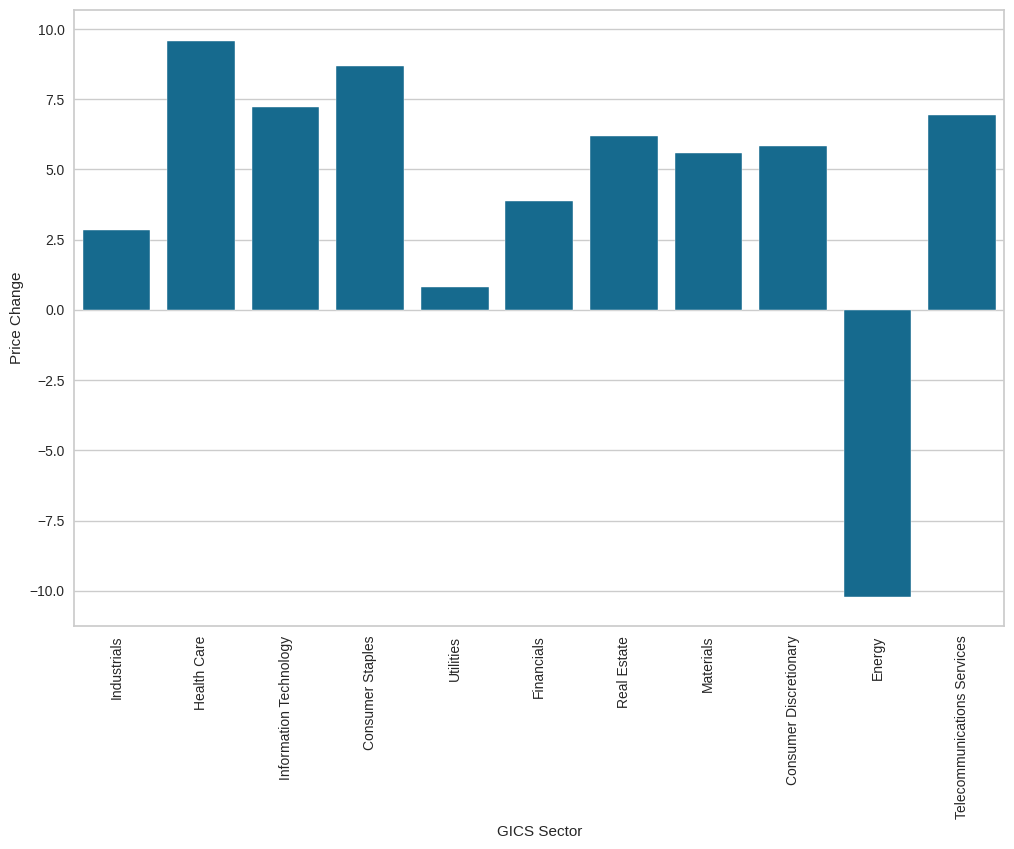

In [ ]:
# Visualize the barplot of the Price change across the Sectors
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="GICS Sector", y="Price Change", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations**

*   The Energy Sector has a price change of -10% in 13 weeks time span. Hence the Investors need to be cautious in investing in the Energy Sector as the stock prices has gone down 10%.
*   The Health care sector is performing well with an increase in price of around 9% in the 13 weeks timeframe.  
*   The Prices of the Consumer Staples and the Information technology sectors have gone up by 8% and 7%. These are good options for the investors.






#### GICS Sector Vs Volatility

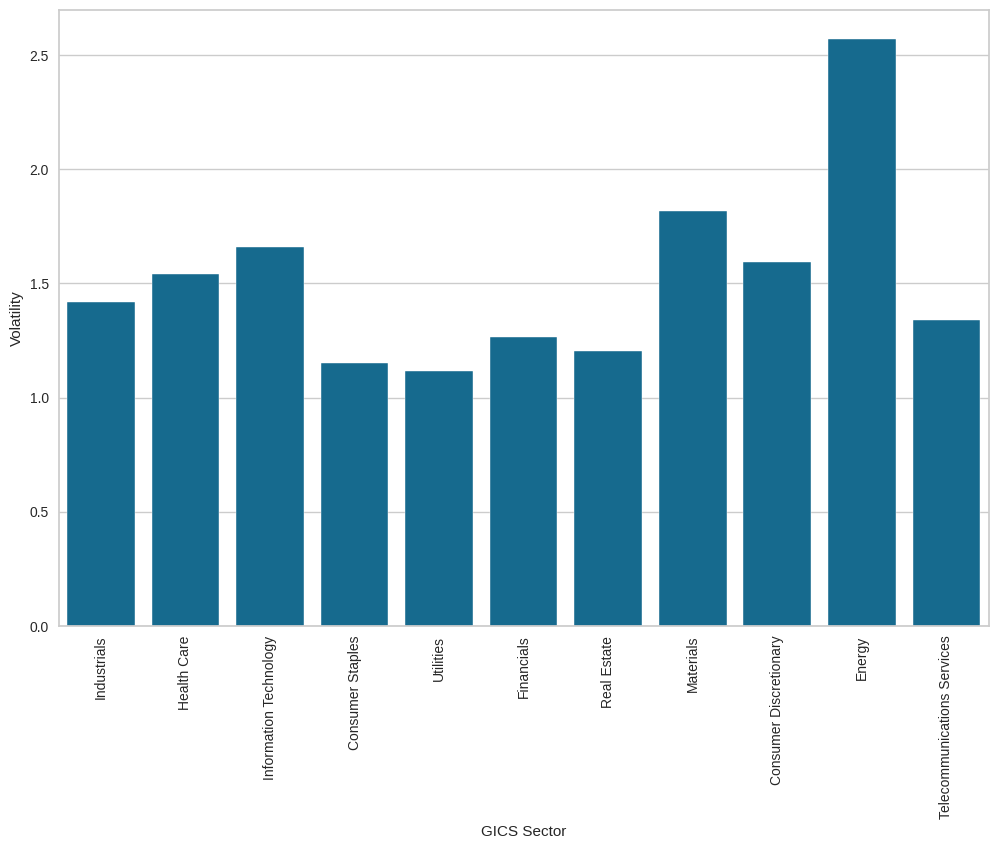

In [ ]:
# Visualize the barplot of the Volatility across the Sectors
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="GICS Sector", y="Volatility", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations**

*   As seen in the above visualization, the Energy sector seems to be highly volatile which aligns with the previous findings on the Price change as well. Hence it is a riskier sector to invest.
*   The second highest volatility is the Materials sector with around 1.7 dollars. It is not as risky as the Energy sector. The risk factor is medium.
*   The Consumer Staples, Utilities, Financials and Real Estate seems be less volatile. Hence these are good options for Investment.






#### GICS Sector vs Cash Ratio

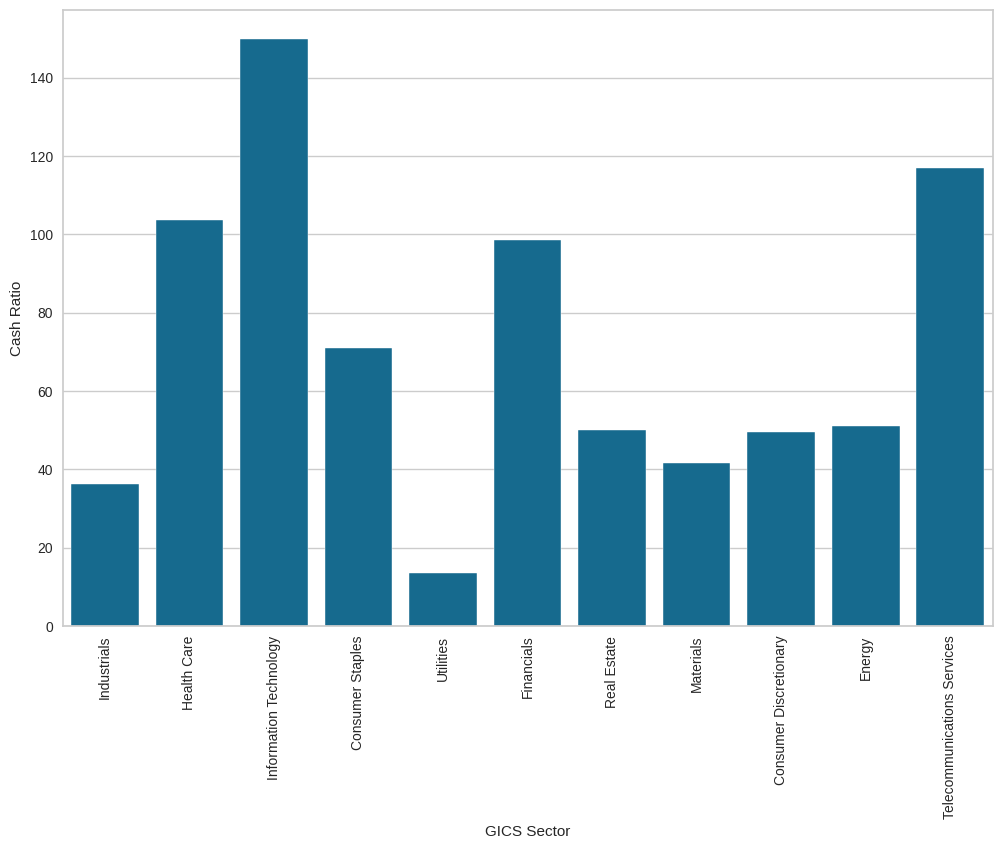

In [ ]:
# Visualize the barplot of the Cash Ratio across the Sectors
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations**

*   The Cash ratio of the Information technology sector is highest with 140 followed by Telecommunication services and Health care sectors.
*   The Utilities sector has a very low cash ratio of 15.



#### GICS Sector Vs P/E Ratio

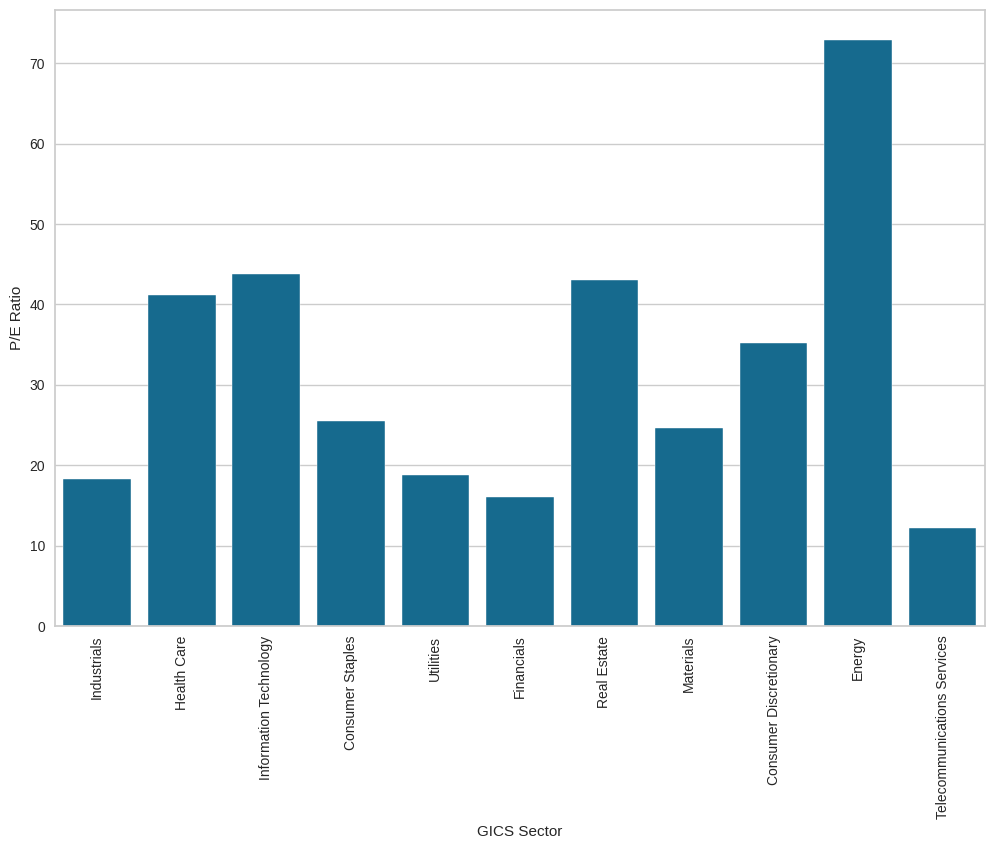

In [ ]:
# Visualize the barplot of the P/E ratio across the Sectors
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="GICS Sector", y="P/E Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations**

*   The Energy Sector has a very high P/E ratio hence it is bad idea to invest in the Energy sector.
*   The P/E ratio of Industrials, Consumer Staples, Financials, Utilities, Materials are below 20. It might be a good decision to invest in the stocks of these sectors.



### Correlation Matrix

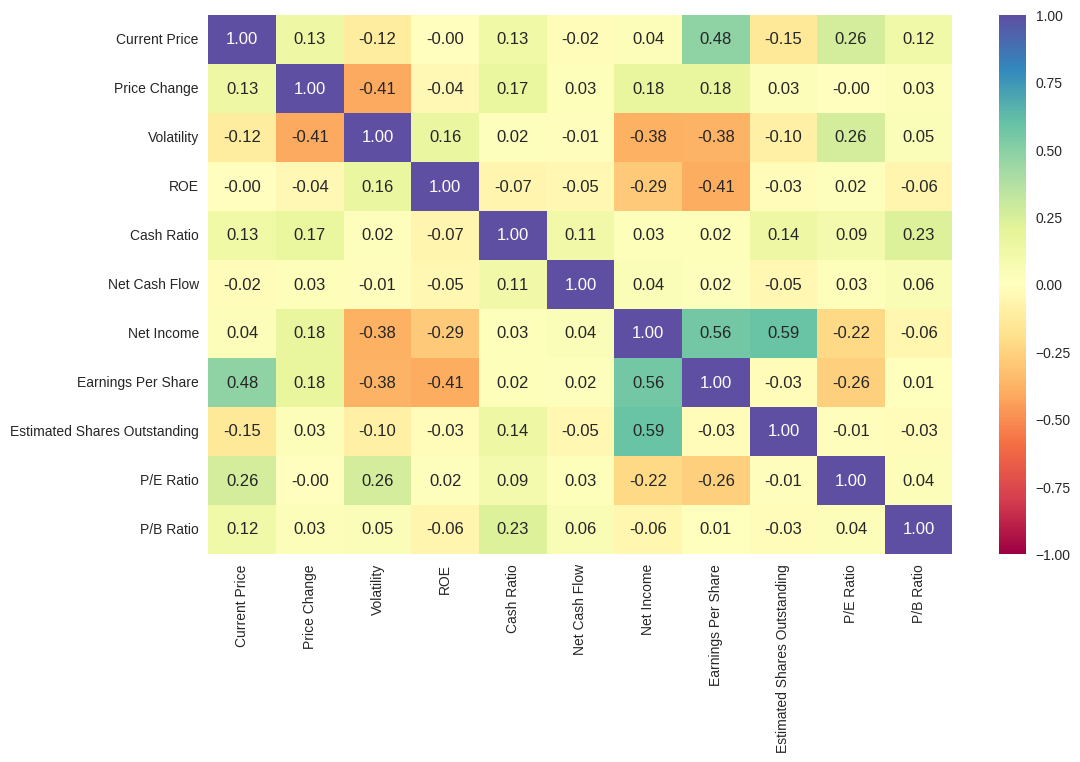

In [ ]:
# correlation check
plt.figure(figsize=(12, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Pair plot of the numeric columns

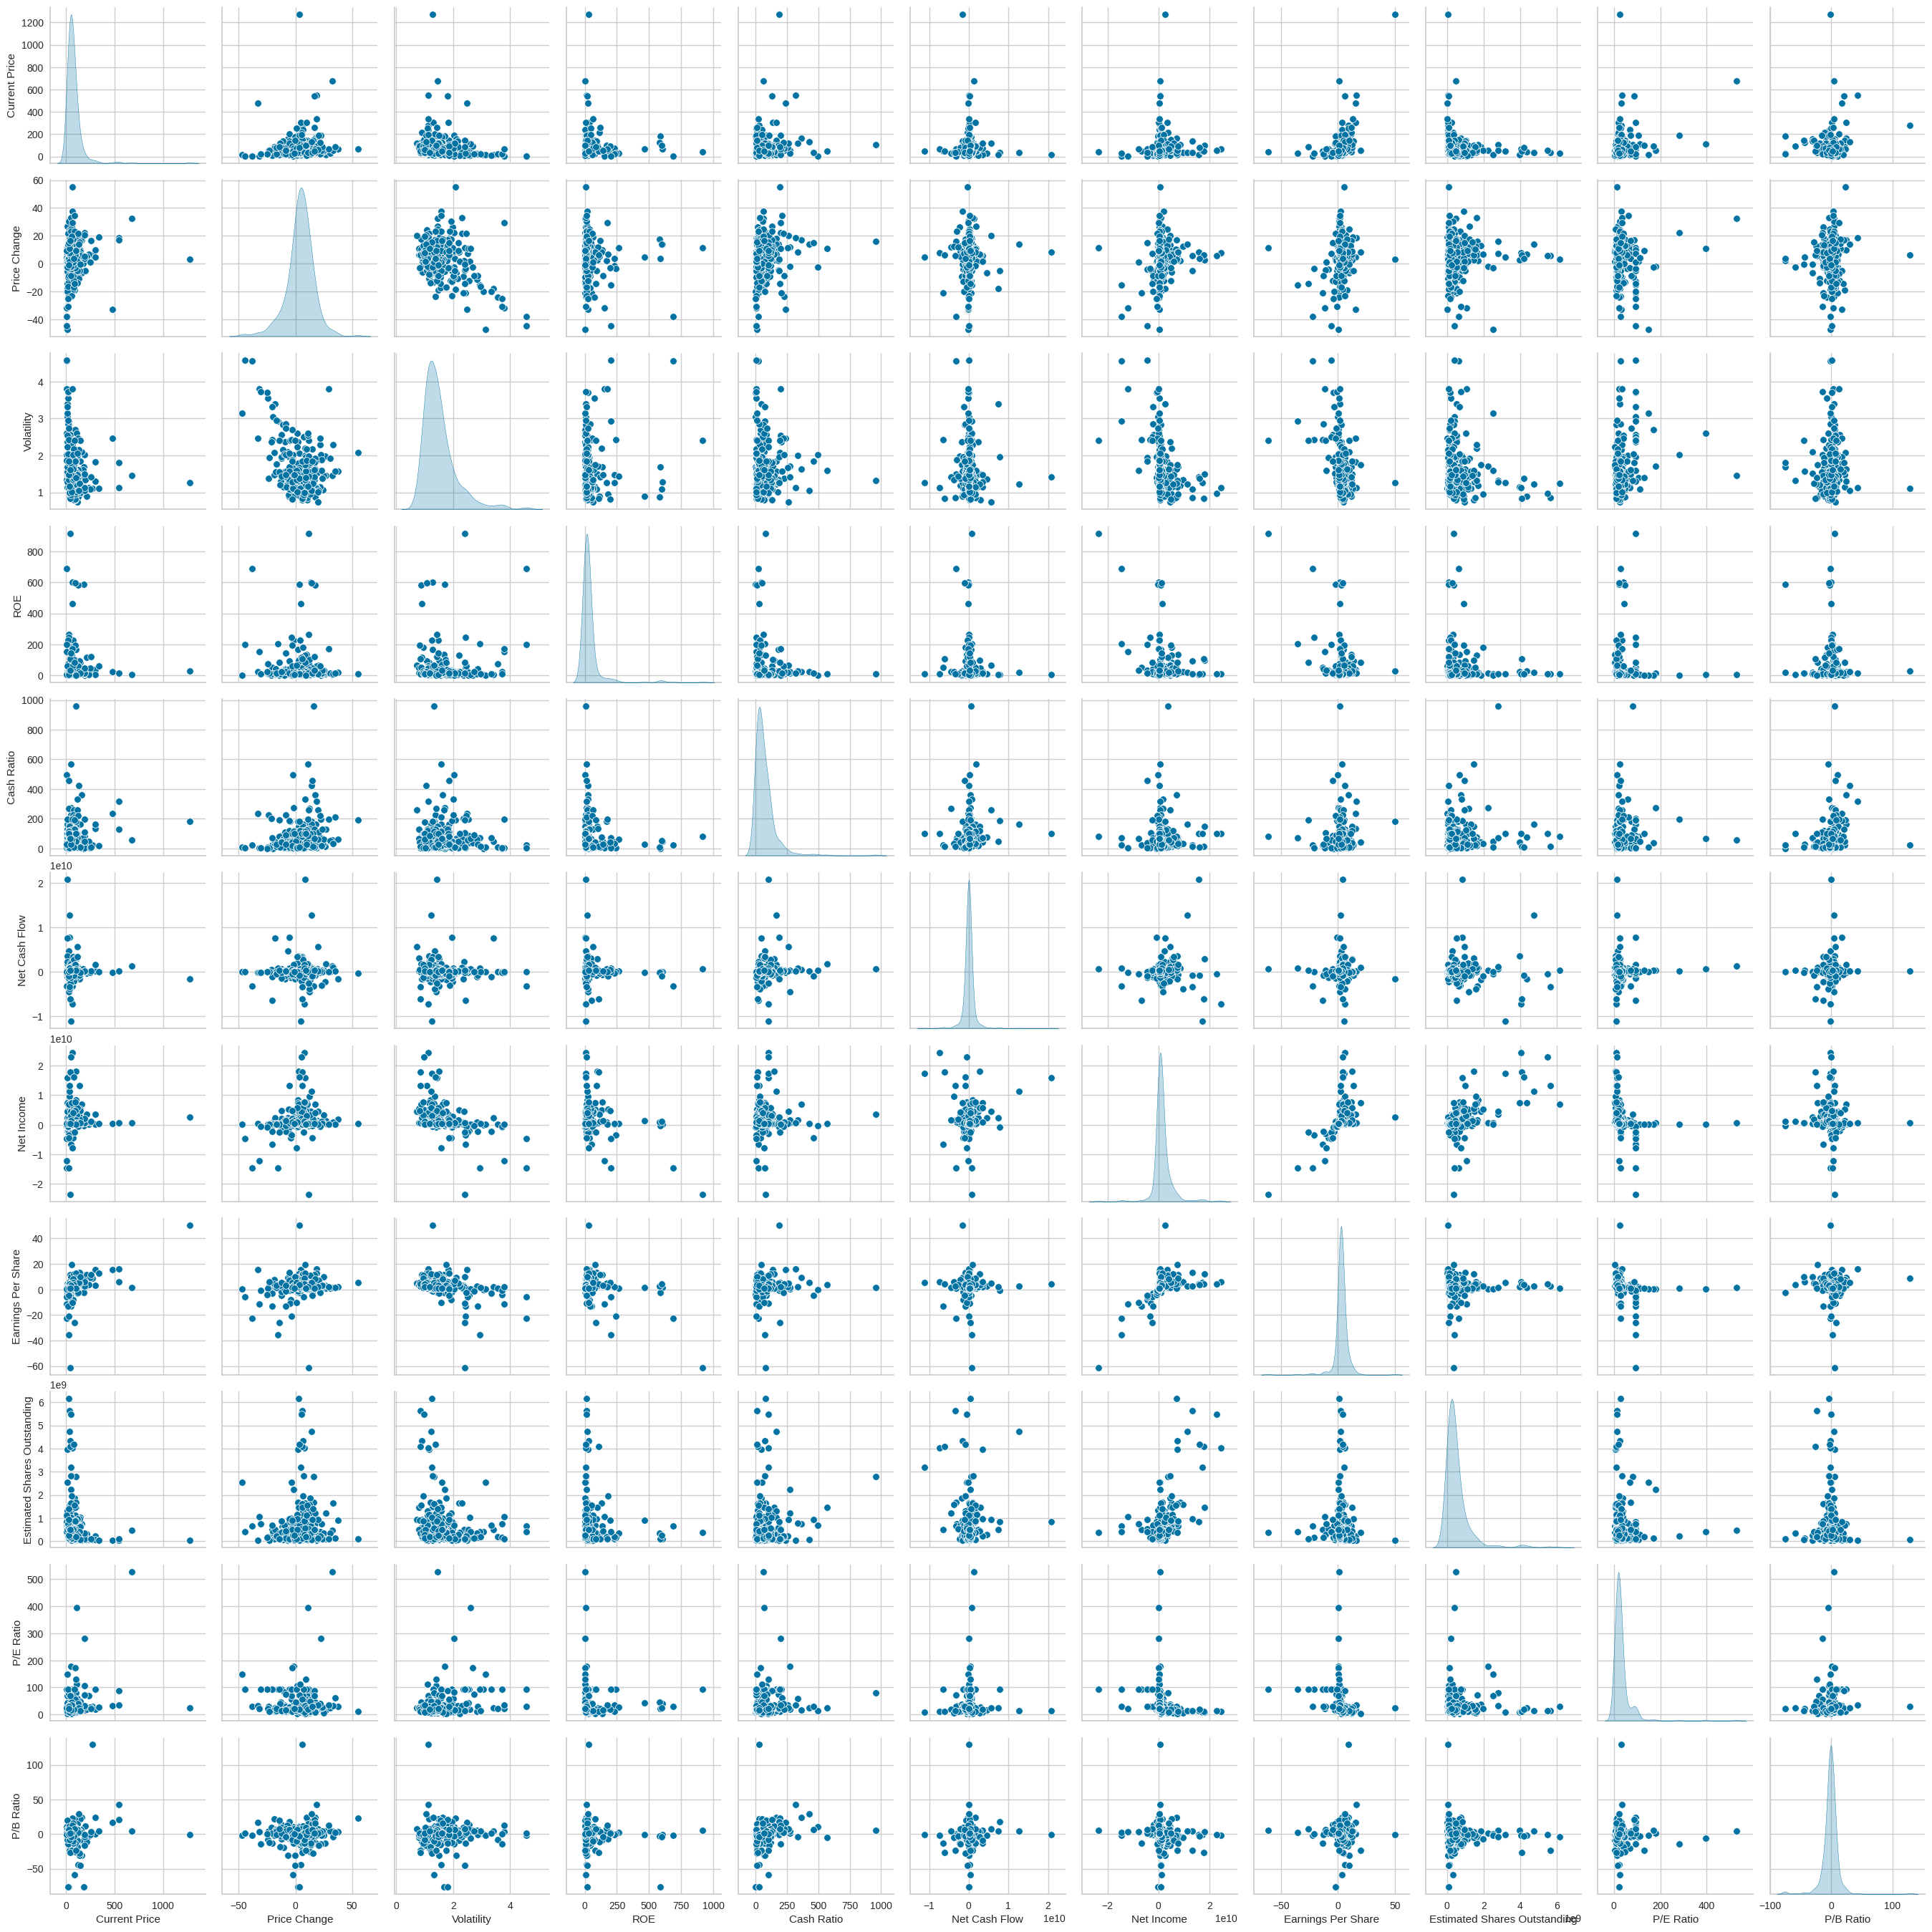

In [ ]:
# view the Pair plot of the numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations from the Correlation Matrix and Pair Plot**

*   The Current Price and the Earnings Per share has a positive correlation between each other meaning as the stock price is increased the earnings per share also increases.
*   The Net Income has a good positive correlation with Earnings per share and Estimated shares outstanding. As the companies Net Income increases its obvious that their earnings per share also increases and so is the number of outstanding stocks.
*   The Volatility has a negative correlation with Price change, Net Income and Earnings per share.
*   The Financial measure ROE has a moderate negative correlation with Earnings per share.





### EDA - Summary of Observations

*   The distribution of the Current Price is right skewed with some outliers on the right. The current stock price of 50% of the companies listed in the Stock dataset is less than 60 dollars.
*   The Energy Sector has a price change of -10% in 13 weeks time span. Hence the Investors need to be cautious in investing in the Energy Sector as the stock prices has gone down 10%.
*   The Health care sector is performing well with an increase in price of around 9% in the 13 weeks timeframe.
*   The Cash ratio of the Information technology sector is highest with 140 followed by Telecommunication services and Health care sectors. The Utilities sector has a very low cash ratio of 15.
*   The Energy Sector has a very high P/E ratio hence it is bad idea to invest in the Energy sector. The P/E ratio of Industrials, Consumer Staples, Financials, Utilities, Materials are below 20. It might be a good decision to invest in the stocks of these sectors.
*   The Current Price and the Earnings Per share has a positive correlation between each other meaning as the stock price is increased the earnings per share also increases. The Net Income has a good positive correlation with Earnings per share and Estimated shares outstanding. As the companies Net Income increases its obvious that their earnings per share also increases and so is the number of outstanding stocks.
*   The Volatility has a negative correlation with Price change, Net Income and Earnings per share. The Financial measure ROE has a moderate negative correlation with Earnings per share.



## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

The Missing value check and duplicate entries check are already carried out in the beginning of the analysis. Hence lets do the Outliers check.

### Outlier detection

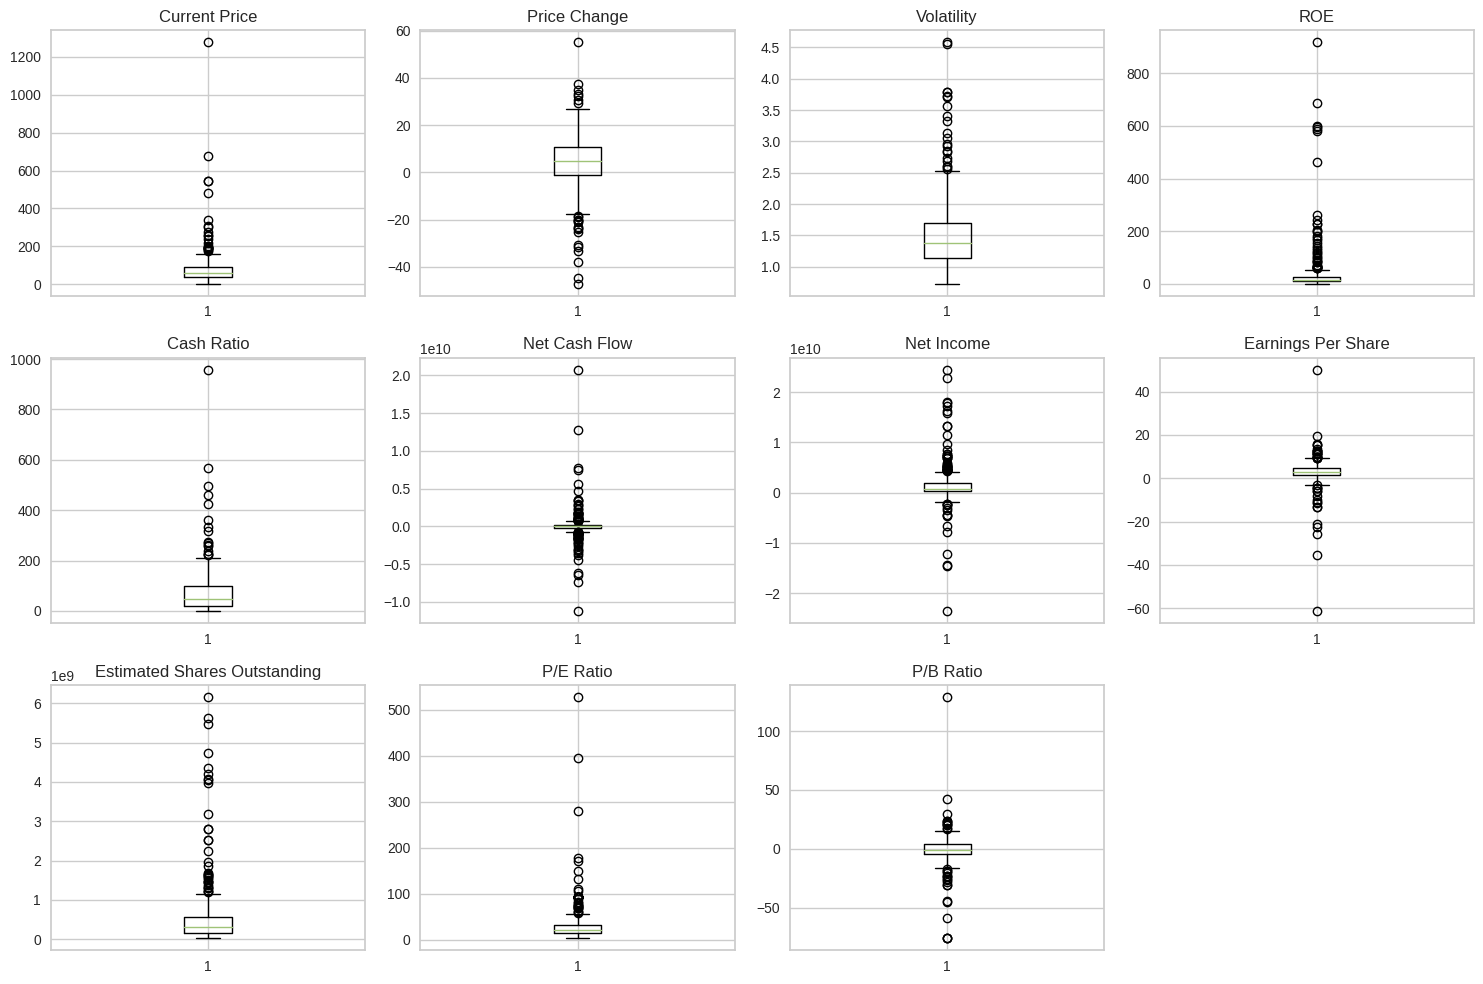

In [14]:
# Visualize if there are outliers in the atrributes with boxplot
plt.figure(figsize=(15, 10))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

There are outliers in all the columns of the stock dataset. But it seems to be actual values and not very extreme values. Hence lets not treat the outliers and proceed with further analysis.

### Scaling the data

In [15]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [16]:
# view a preview of the scaled data
subset_scaled

array([[-0.39334123,  0.49394985,  0.2727489 , ...,  0.10786299,
        -0.65248711, -0.50665346],
       [-0.2208372 ,  0.35543891,  1.13704483, ...,  1.25027416,
        -0.31176905, -0.50420469],
       [-0.36719495,  0.6024795 , -0.42700717, ...,  1.09802058,
        -0.39150173,  0.09494078],
       ...,
       [ 0.22191276,  0.43953914, -0.20606693, ..., -0.46005754,
         2.23363447, -1.58938994],
       [-0.54705258, -0.43681096, -0.09781298, ..., -0.37785227,
        -0.22271438,  0.11867997],
       [-0.3364527 ,  1.05104602,  0.14267127, ..., -0.09294161,
         0.85490199,  0.24675384]])

In [17]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [18]:
# view the first few rows of the scaled data
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

**The original dataset has been scaled to be unbiased on the units of the numerical columns to perform clustering of the dataset.**

## K-means Clustering

Lets proceed with K-Means Clustering by evaluating the Elbow Plot and Silhouette score.

### Elbow Plot

In [19]:
# copying the scaled dataframe to a new dataframe
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068


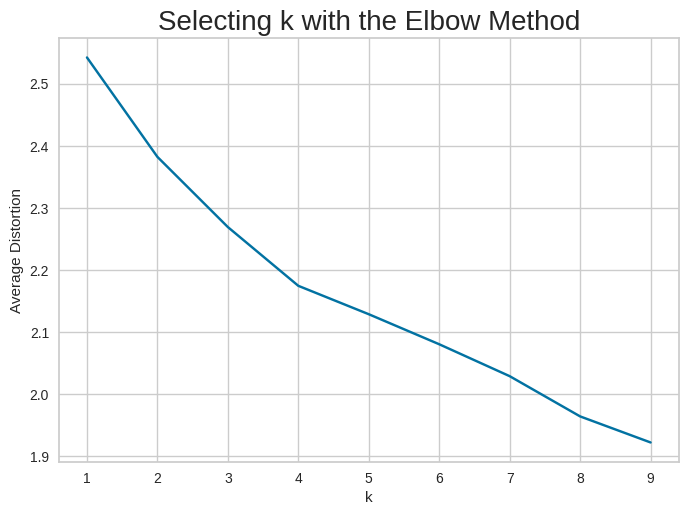

In [20]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

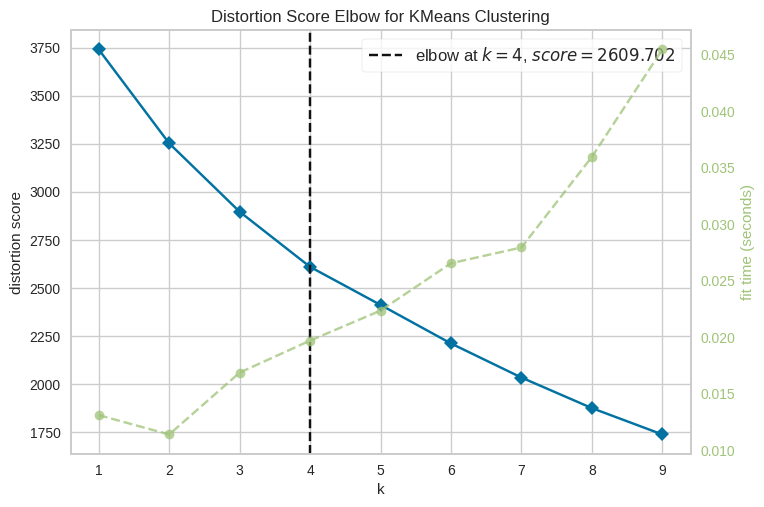

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=True)
# fit the data to the visualizer
visualizer.fit(k_means_df)
visualizer.show()

**Observations**

The appropriate value of k from the elbow curve seems to be 4 or 5. As there is a higher difference in distortion between the K value of 3 and 4 and there seems to be equal interval of distortions after K = 4. We can consider the value of K to be either 4 or 5. Lets check the Silhouette scores and come to a conclusion.

### Silhouette Score

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)


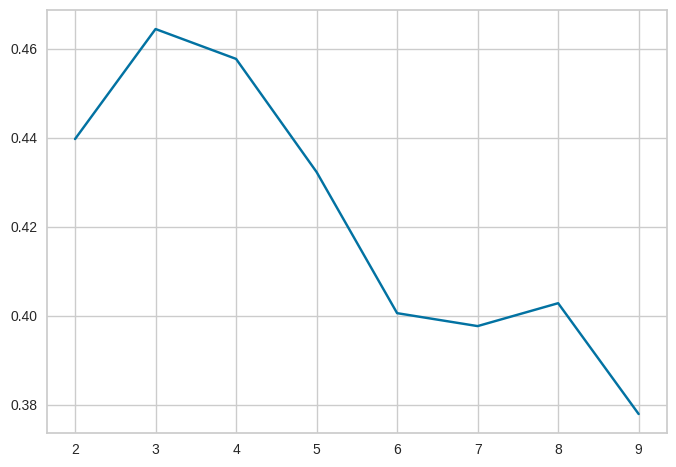

In [22]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

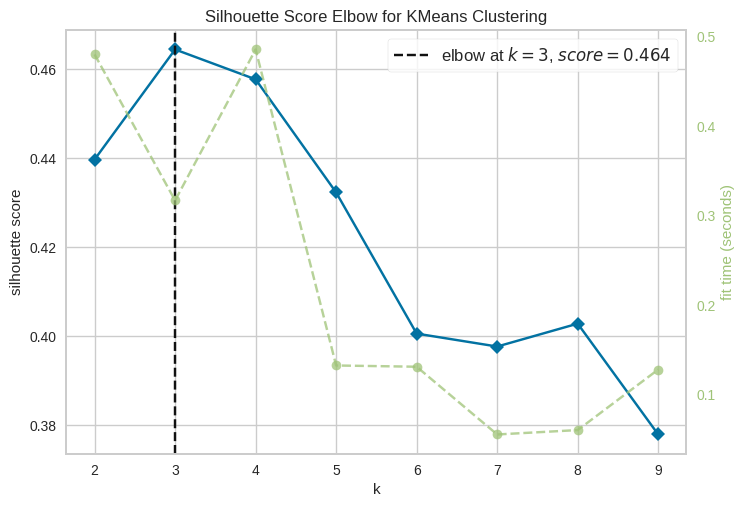

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Observations**

From the above silhouette scores, it seems that at k = 3 the silhouette score is high. There isn't a much differene in the score at k = 4 as well. There is an elbow at K=4 as seen in the Elbow plot. Lets check the distribution of the data.

**Lets visualize the distribution of the clusters at k =3**

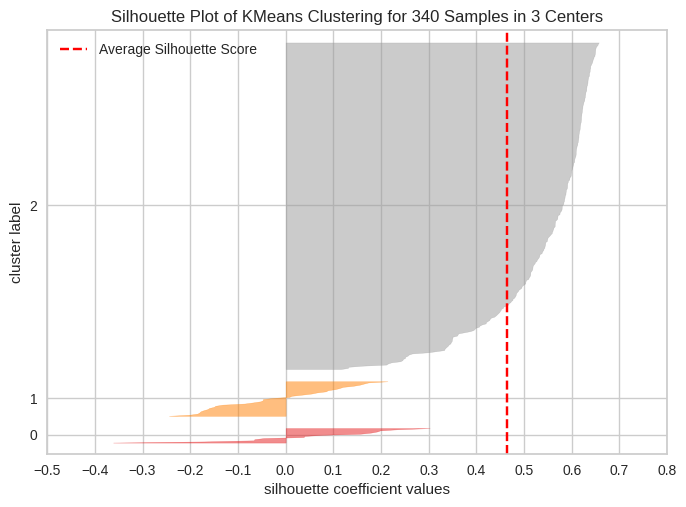

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Lets visualize the distribution of the clusters at k =4**

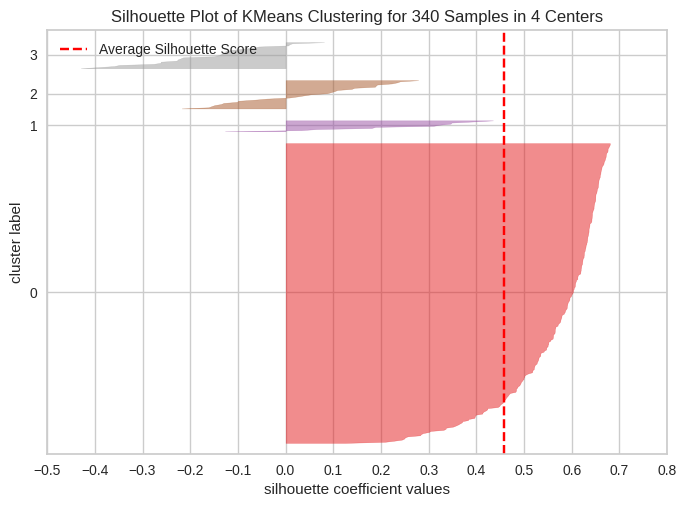

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Lets visualize the distribution of the clusters at k =5**

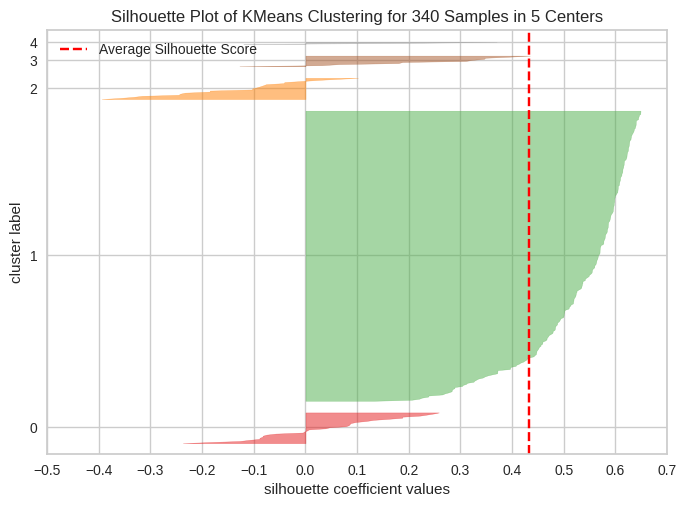

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Lets visualize the distribution of the clusters at k =6**

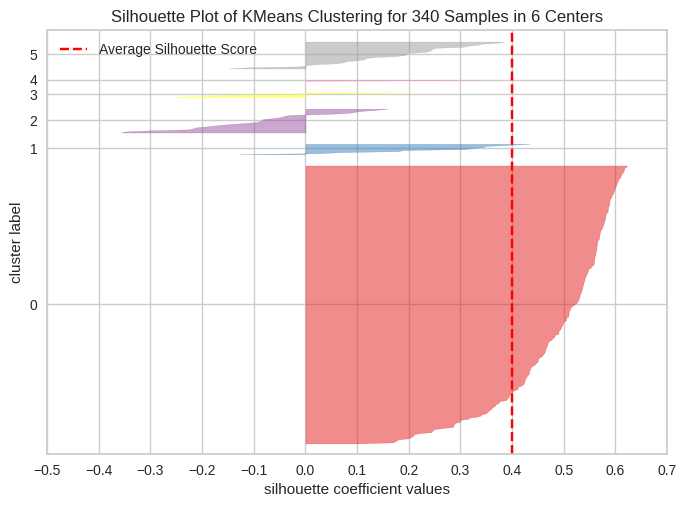

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Lets visualize the distribution of the clusters at k =7**

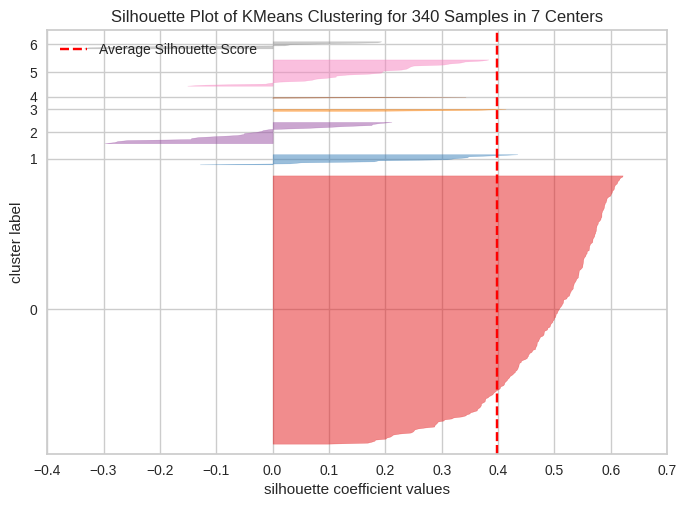

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Observations**

From the above visualization of the Silhouettte scores, it seems that with 4 clusters there seems to be good distribution of the dataset. With Five clusters, there is some amount of data in the 5th cluster but not a very good distribution at the 5th cluster. Hence the Silhouette score at K=4 is really good. Hence lets finalize the K value to be 4.

### Selecting final model

**Let's take 4 as the appropriate no. of clusters as the silhouette score is high enough and also from the Elbow plot at there is knick at 4 in the elbow curve.**

In [29]:
# Final K means Model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [30]:
# creating a copy of the original data
df1 = df.copy()

In [31]:
# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [32]:
# check the lables assignment
df1.sample(10)

Ticker Symbol                 Security             GICS Sector  \
220           MYL               Mylan N.V.             Health Care   
86            DAL          Delta Air Lines             Industrials   
78            CSX                CSX Corp.             Industrials   
313          VRSK         Verisk Analytics             Industrials   
131          FLIR             FLIR Systems  Information Technology   
98            DOV              Dover Corp.             Industrials   
118            EW     Edwards Lifesciences             Health Care   
153           HES         Hess Corporation                  Energy   
320           WFC              Wells Fargo              Financials   
227           NFX  Newfield Exploration Co                  Energy   

                      GICS Sub Industry  Current Price  Price Change  \
220                     Pharmaceuticals      54.070000     33.177346   
86                             Airlines      50.689999     13.375084   
78                            Railroads      25.950001     -4.349421   
313      Research & Consulting Services      76.879997     -1.448539   
131  Electronic Equipment & Instruments      28.070000      0.214209   
98                 Industrial Machinery      61.310001      6.979585   
118               Health Care Equipment      78.980003     11.616734   
153                Integrated Oil & Gas      48.480000     -4.585713   
320                               Banks      54.360001      5.532912   
227  Oil & Gas Exploration & Production      32.560001     -3.296695   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
220    2.299304    9          30     1010500000    847600000   
86     1.444219   42          31     -116000000   4526000000   
78     1.626219   17          74      -41000000   1968000000   
313    1.454019   37          10       98989000    507577000   
131    1.761193   15          81      -58589000    241686000   
98     1.507569   24          26     -319396000    869829000   
118    1.666482   20         257       64600000    494900000   
153    2.398580   16         103      272000000  -3056000000   
320    0.969774   12          99     -460000000  22894000000   
227    2.421529  244           1       -9000000  -3362000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  \
220                1.58                  1.633016e+09  33.430380  -4.213309   
86                 5.68                  7.968310e+08   8.924296 -16.730022   
78                 2.00                  9.840000e+08  12.975001   0.902439   
313                3.07                  1.653345e+08  25.042344 -13.617440   
131                1.73                  1.397029e+08  16.225434   4.014713   
98                 5.52                  1.575777e+08  11.106884  -2.293440   
118                2.30                  2.151739e+08  34.339132   6.349747   
153              -10.78                  2.834879e+08  28.407929   6.264817   
320                4.18                  5.477033e+09  13.004785  -0.938007   
227              -21.18                  1.587347e+08  93.089287  -0.138596   

     KM_segments  
220            0  
86             0  
78             0  
313            0  
131            0  
98             0  
118            3  
153            2  
320            1  
227            2

## Cluster Profiling

In [33]:
# create a variable to store the mean value of the segments
cluster_profile = df1.groupby("KM_segments").mean()

In [34]:
# store the count of the rows belonging to each segment
cluster_profile["count_in_each_segment"] = (df1.groupby("KM_segments")["Security"].count().values)

In [35]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

The above analysis of the cluster profiling shows that the cluster 0 has more datapoints compared to the other 3 clusters.

In [53]:
## print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [54]:
# getting the count of companies in each sector belonging to every cluster
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

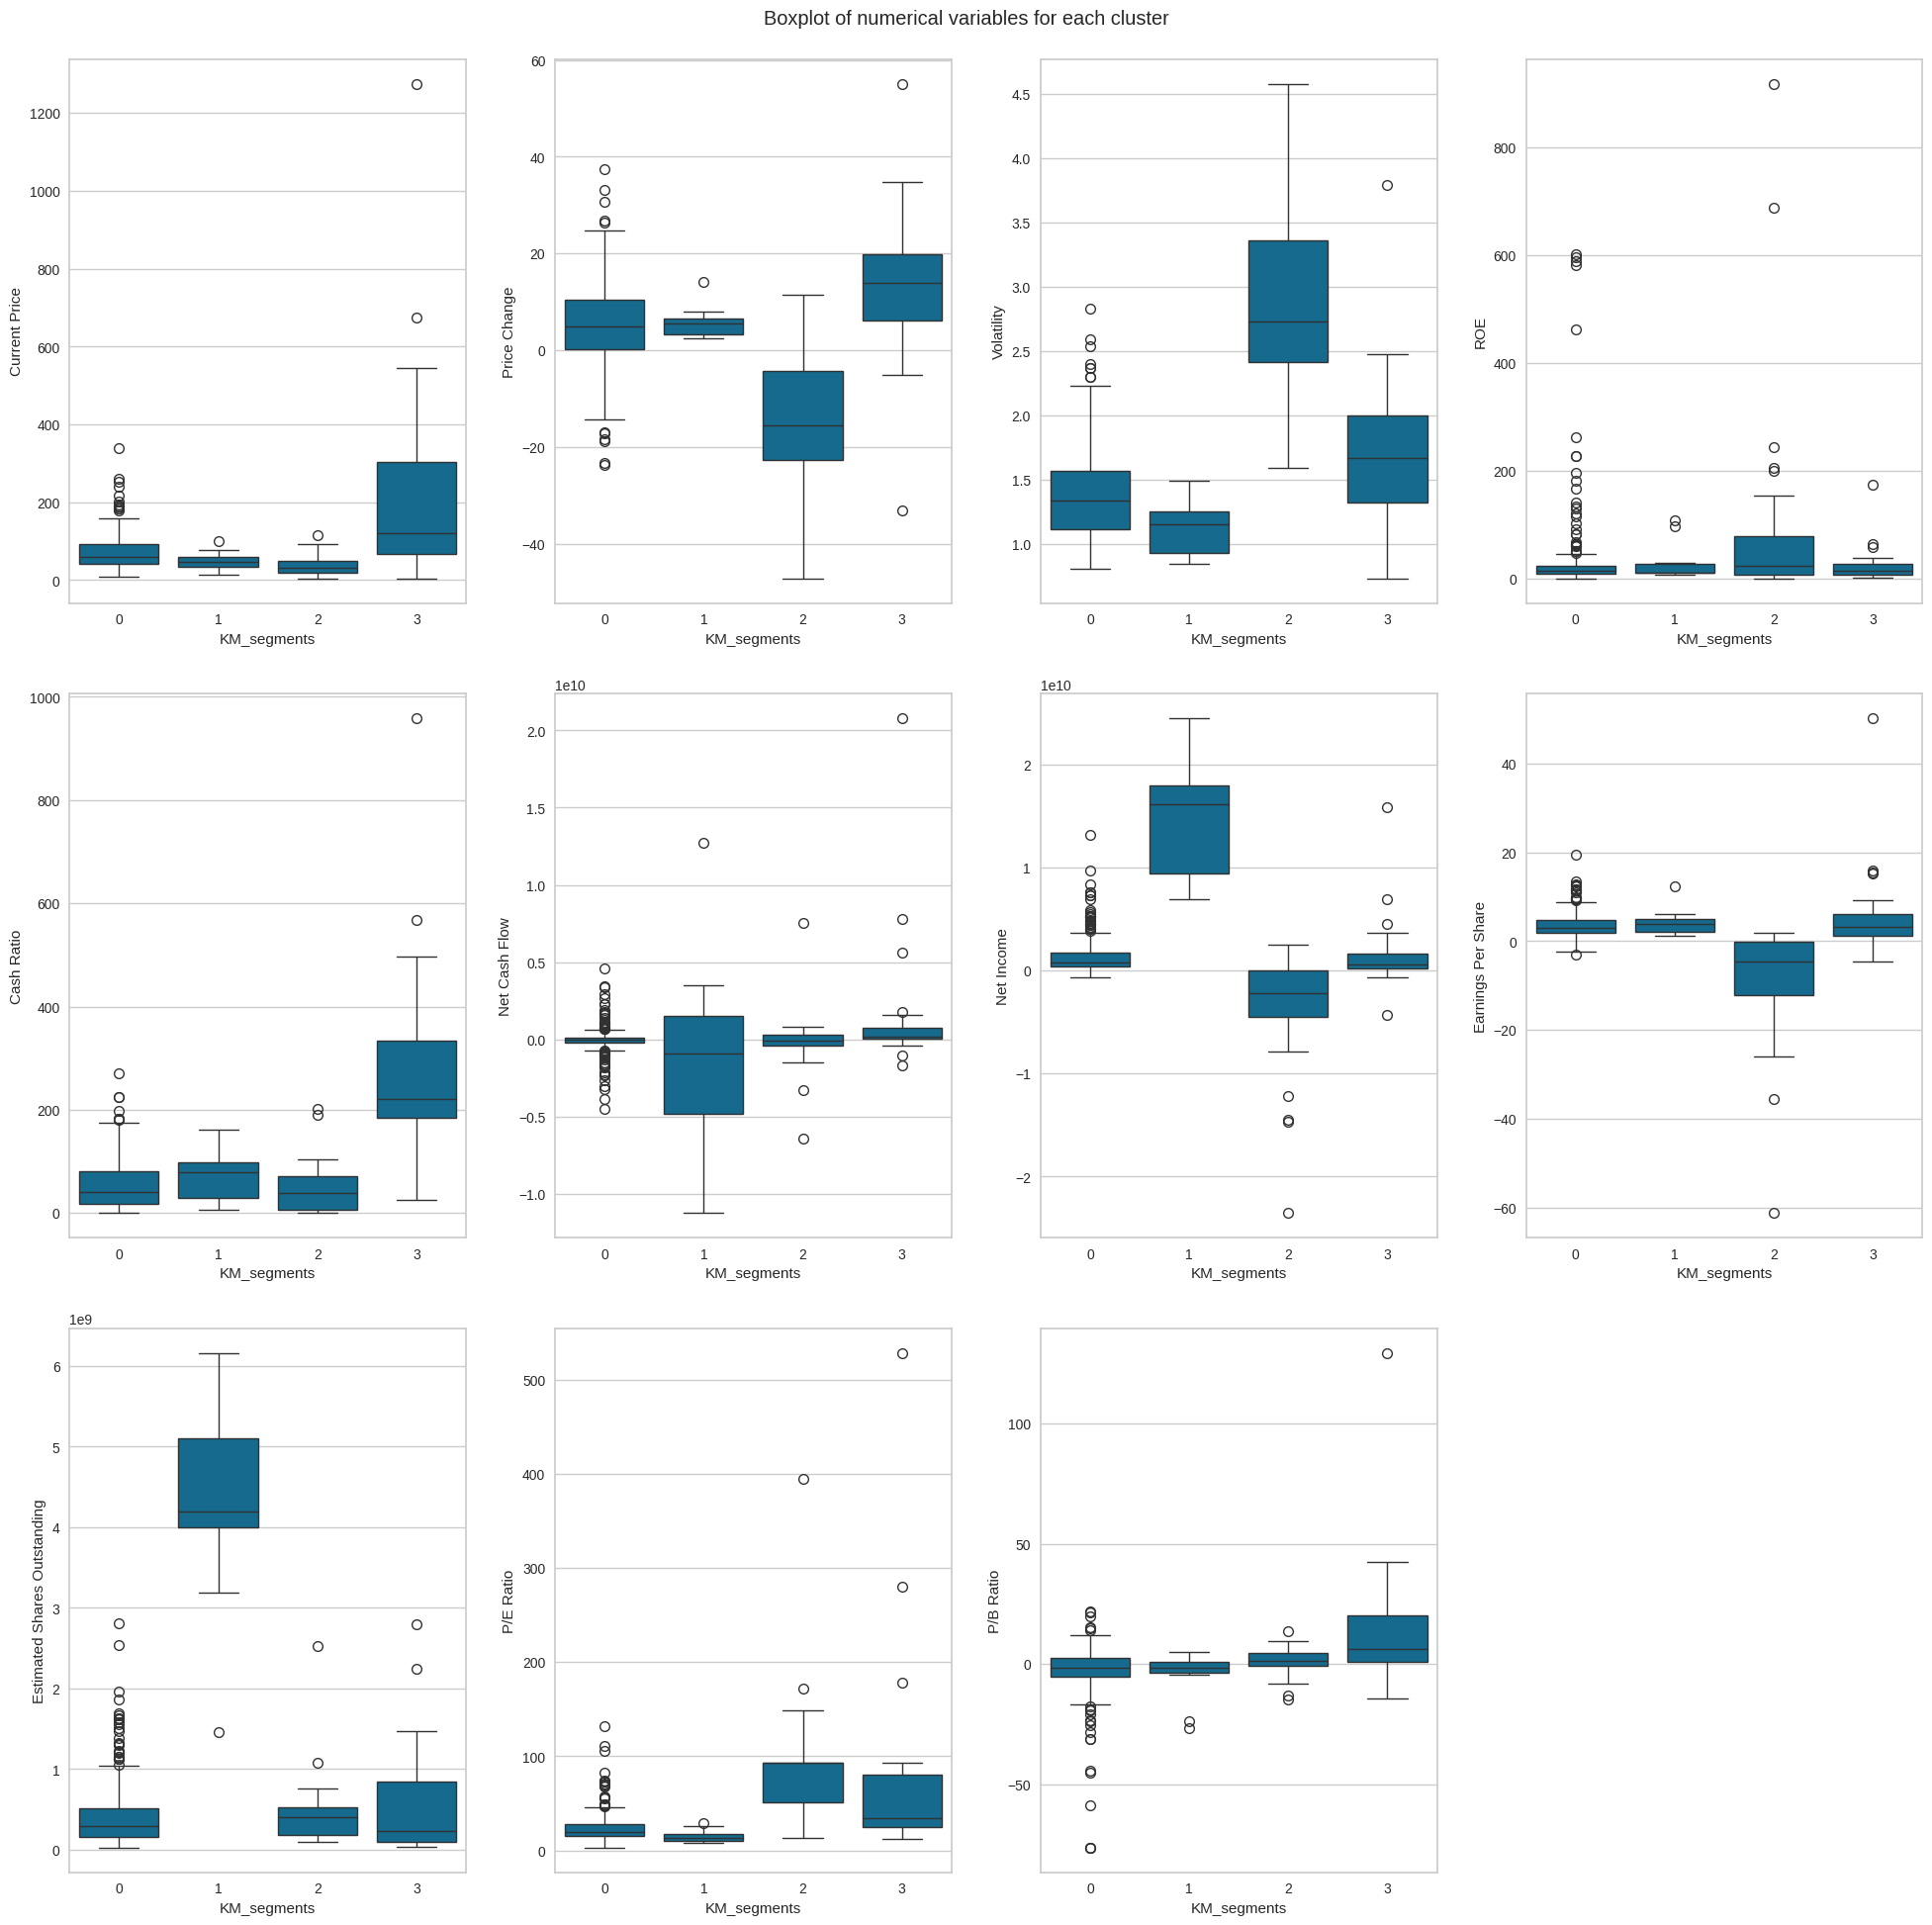

In [36]:
# Visualize the boxplot of the numerical variables in each cluster
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

**Cluster 0**:

*   The Current Price is low in this cluster.
*   The Price change is moderate to high.
*   The Volatility is low to moderate in this cluster.
*   The ROE is low.
*   The Cash Ratio is low.
*   The Net Cash Flow is almost zero with few highs.
*   The Net Income is moderate.
*   The Earnings per share is moderate.
*   The Estimated shares outstanding is low compared to other clusters.
*   The P/E ratio is slightly above the low range.
*   The P/B ratio is slightly better than the low range.

**Cluster 1**:

*   The Current Price is low in this cluster.
*   The Price change is moderate.
*   The Volatility is low in this cluster.
*   The ROE is low.
*   The Cash Ratio is low.
*   The Net Cash Flow is almost zero with few negative values.
*   The Net Income is high in this cluster.
*   The Earnings per share is moderate and almost the same as cluster o and cluster 3.
*   The Estimated shares outstanding is high compared to other clusters.
*   The P/E ratio is in low range.
*   The P/B ratio is in low range.

**Cluster 2**:

*   The Current Price is low in this cluster.
*   The Price change is low compared to all the other clusters.
*   The Volatility is highest compared to all the other clusters.
*   The ROE is low but the maximum value is better than all the other clusters.
*   The Cash Ratio is low and sililar to the cluster 0.
*   The Net Cash Flow is almost zero.
*   The Net Income is low in this cluster.
*   The Earnings per share is low in this cluster.
*   The Estimated shares outstanding is low and similar to cluster 0.
*   The P/E ratio is in high in this cluster.
*   The P/B ratio is in low range.

**Cluster 3**:

*   The Current Price is high in this cluster.
*   The Price change is high compared to all the other clusters.
*   The Volatility is moderate.
*   The ROE is low .
*   The Cash Ratio is high compared to all the other clusters.
*   The Net Cash Flow is almost zero.
*   The Net Income is moderate in this cluster.
*   The Earnings per share is moderate and is almost similar to cluster 0 and cluster 1.
*   The Estimated shares outstanding is low.
*   The P/E ratio is slightly better than the low range.
*   The P/B ratio is high in this cluster.

## Hierarchical Clustering

### Checking Cophenetic Correlation

In [37]:
# creating a new dataframe and copying the scaled dataset
hc_df = subset_scaled_df.copy()

In [38]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [39]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**The Euclidean distance with average linkage method gives the highest cophenetic correlation of 0.94. Hence let's explore different linkage methods with Euclidean distance only.**

In [40]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [41]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**The Euclidean distance measure with average linkage gives the highest cophentic correlation followed by the Centroid and Single linkage methods.**

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods with Euclidean distance measure.**

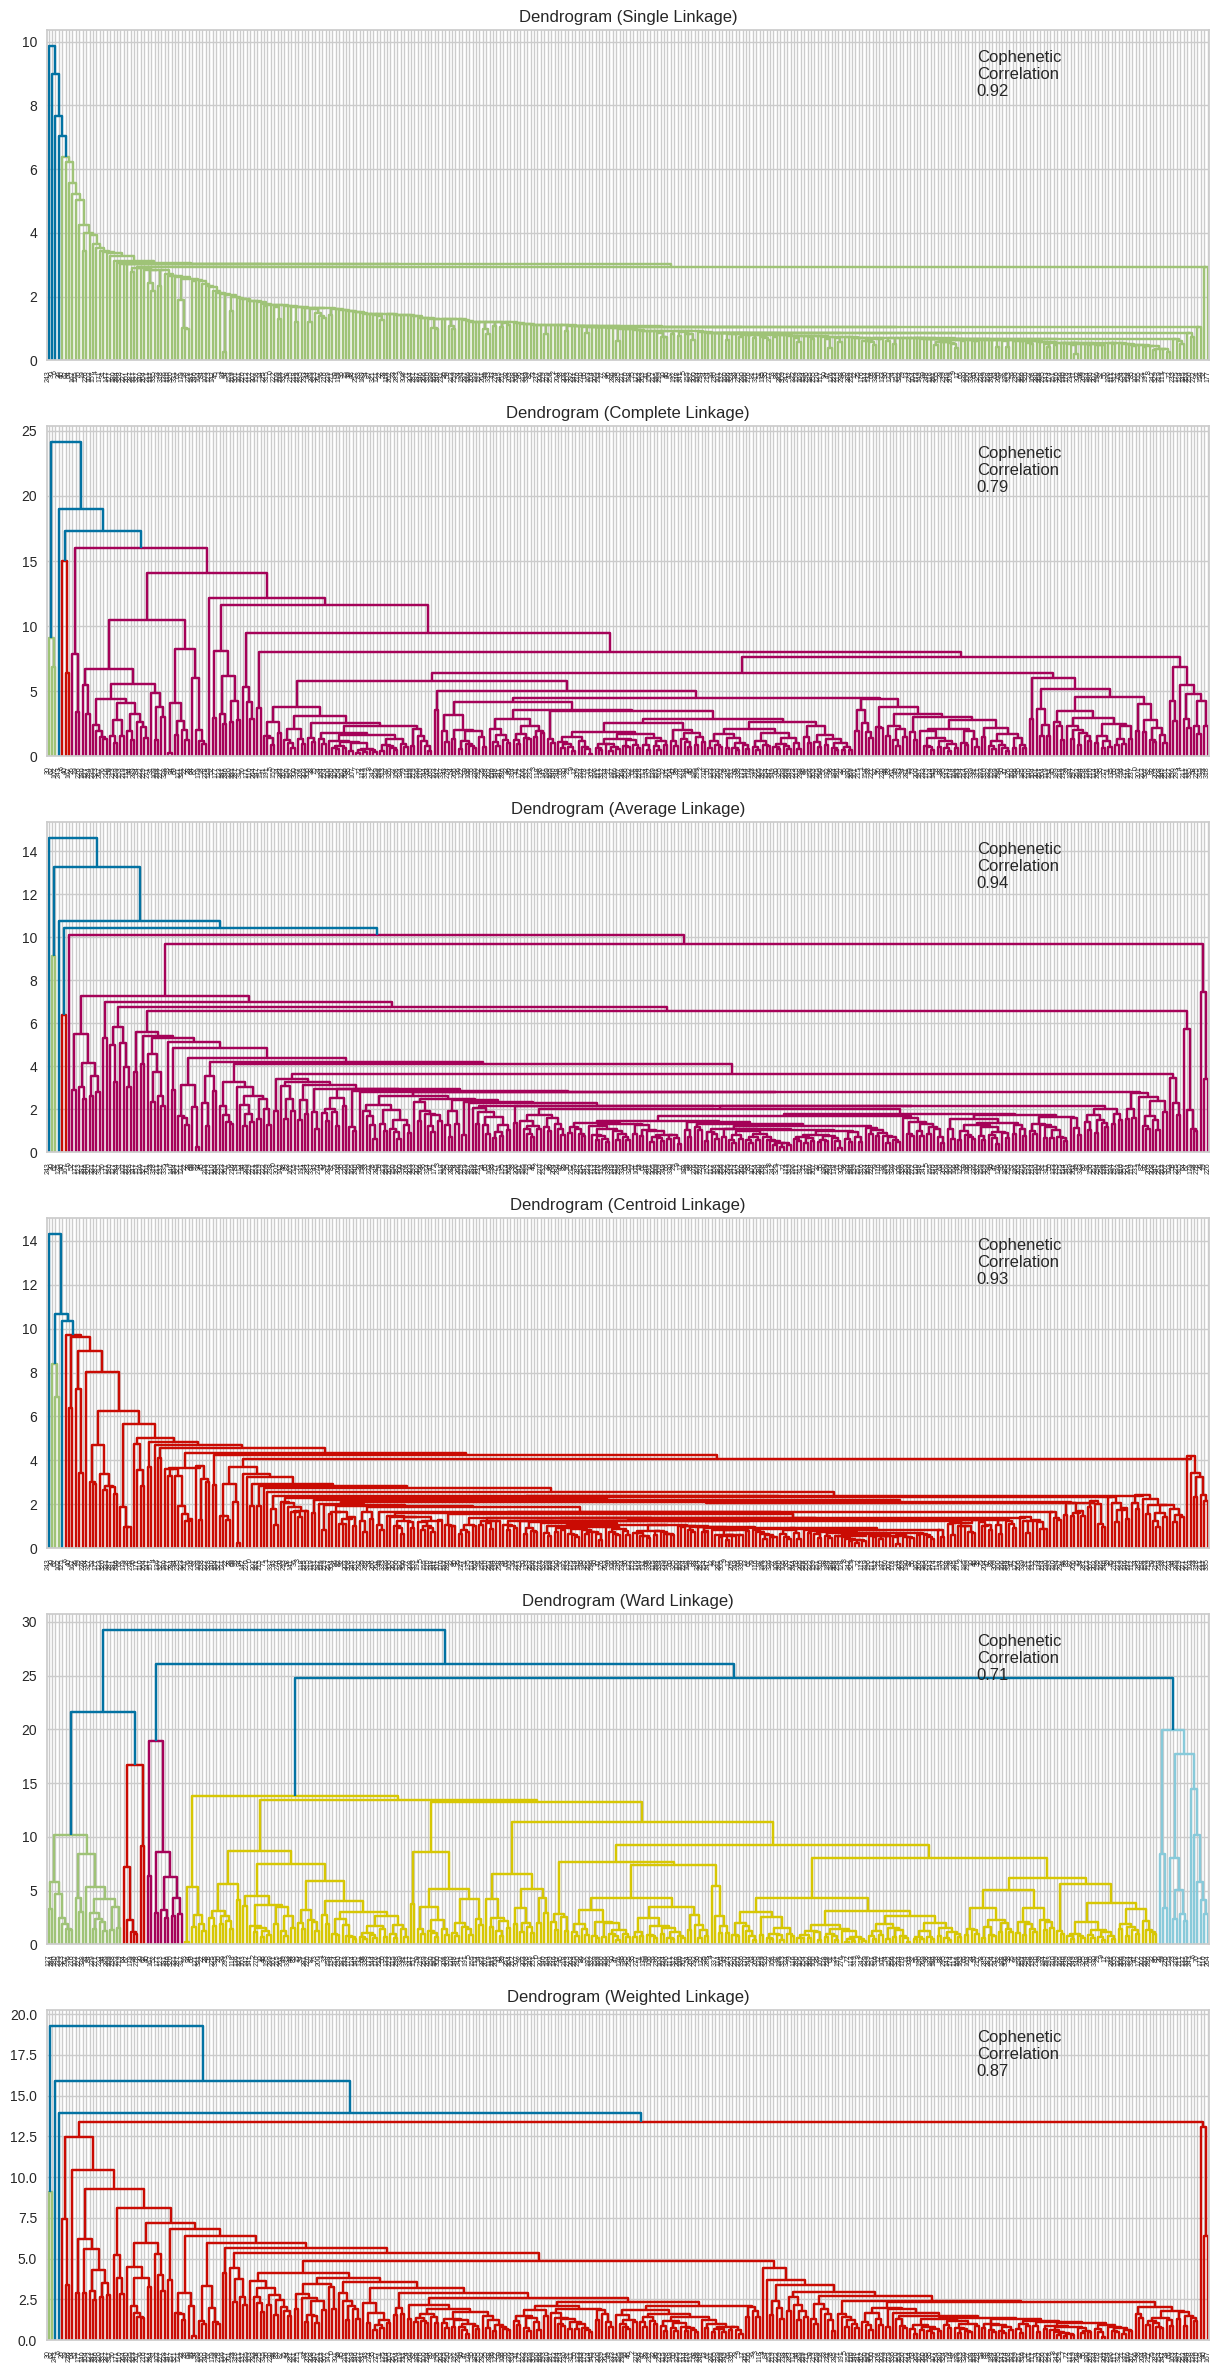

In [42]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**From the Dendrogram, we are able to see that the ward linkage with Euclidean distance measure gives seperate and distinct clusters.**

In [43]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

**Observations**

*   The Cophentic correlation is highest for average linkage with Euclidean distance measure.
*   Although the Euclidean distance measure with average linkage gives the highest cophenetic correlation, the clusters are not distinct.
*   The ward linkage gives the distinct and seperate clusters.
*   The Ward Linkage with 6 clusters appears to be the appropriate number of clusters from the dendrogram.











### Creating Model using sklearn

In [44]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [45]:
# creating a copy of the original data
df2 = df.copy()

In [46]:
# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [47]:
# Grouping the dataset with Cluster labels
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [48]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values)

In [49]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [50]:
# let's see the names of the countries in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [51]:
# lets see how many companies beling to each GICS Sector in each of the cluster
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

**The clusters seem to have more variability.**

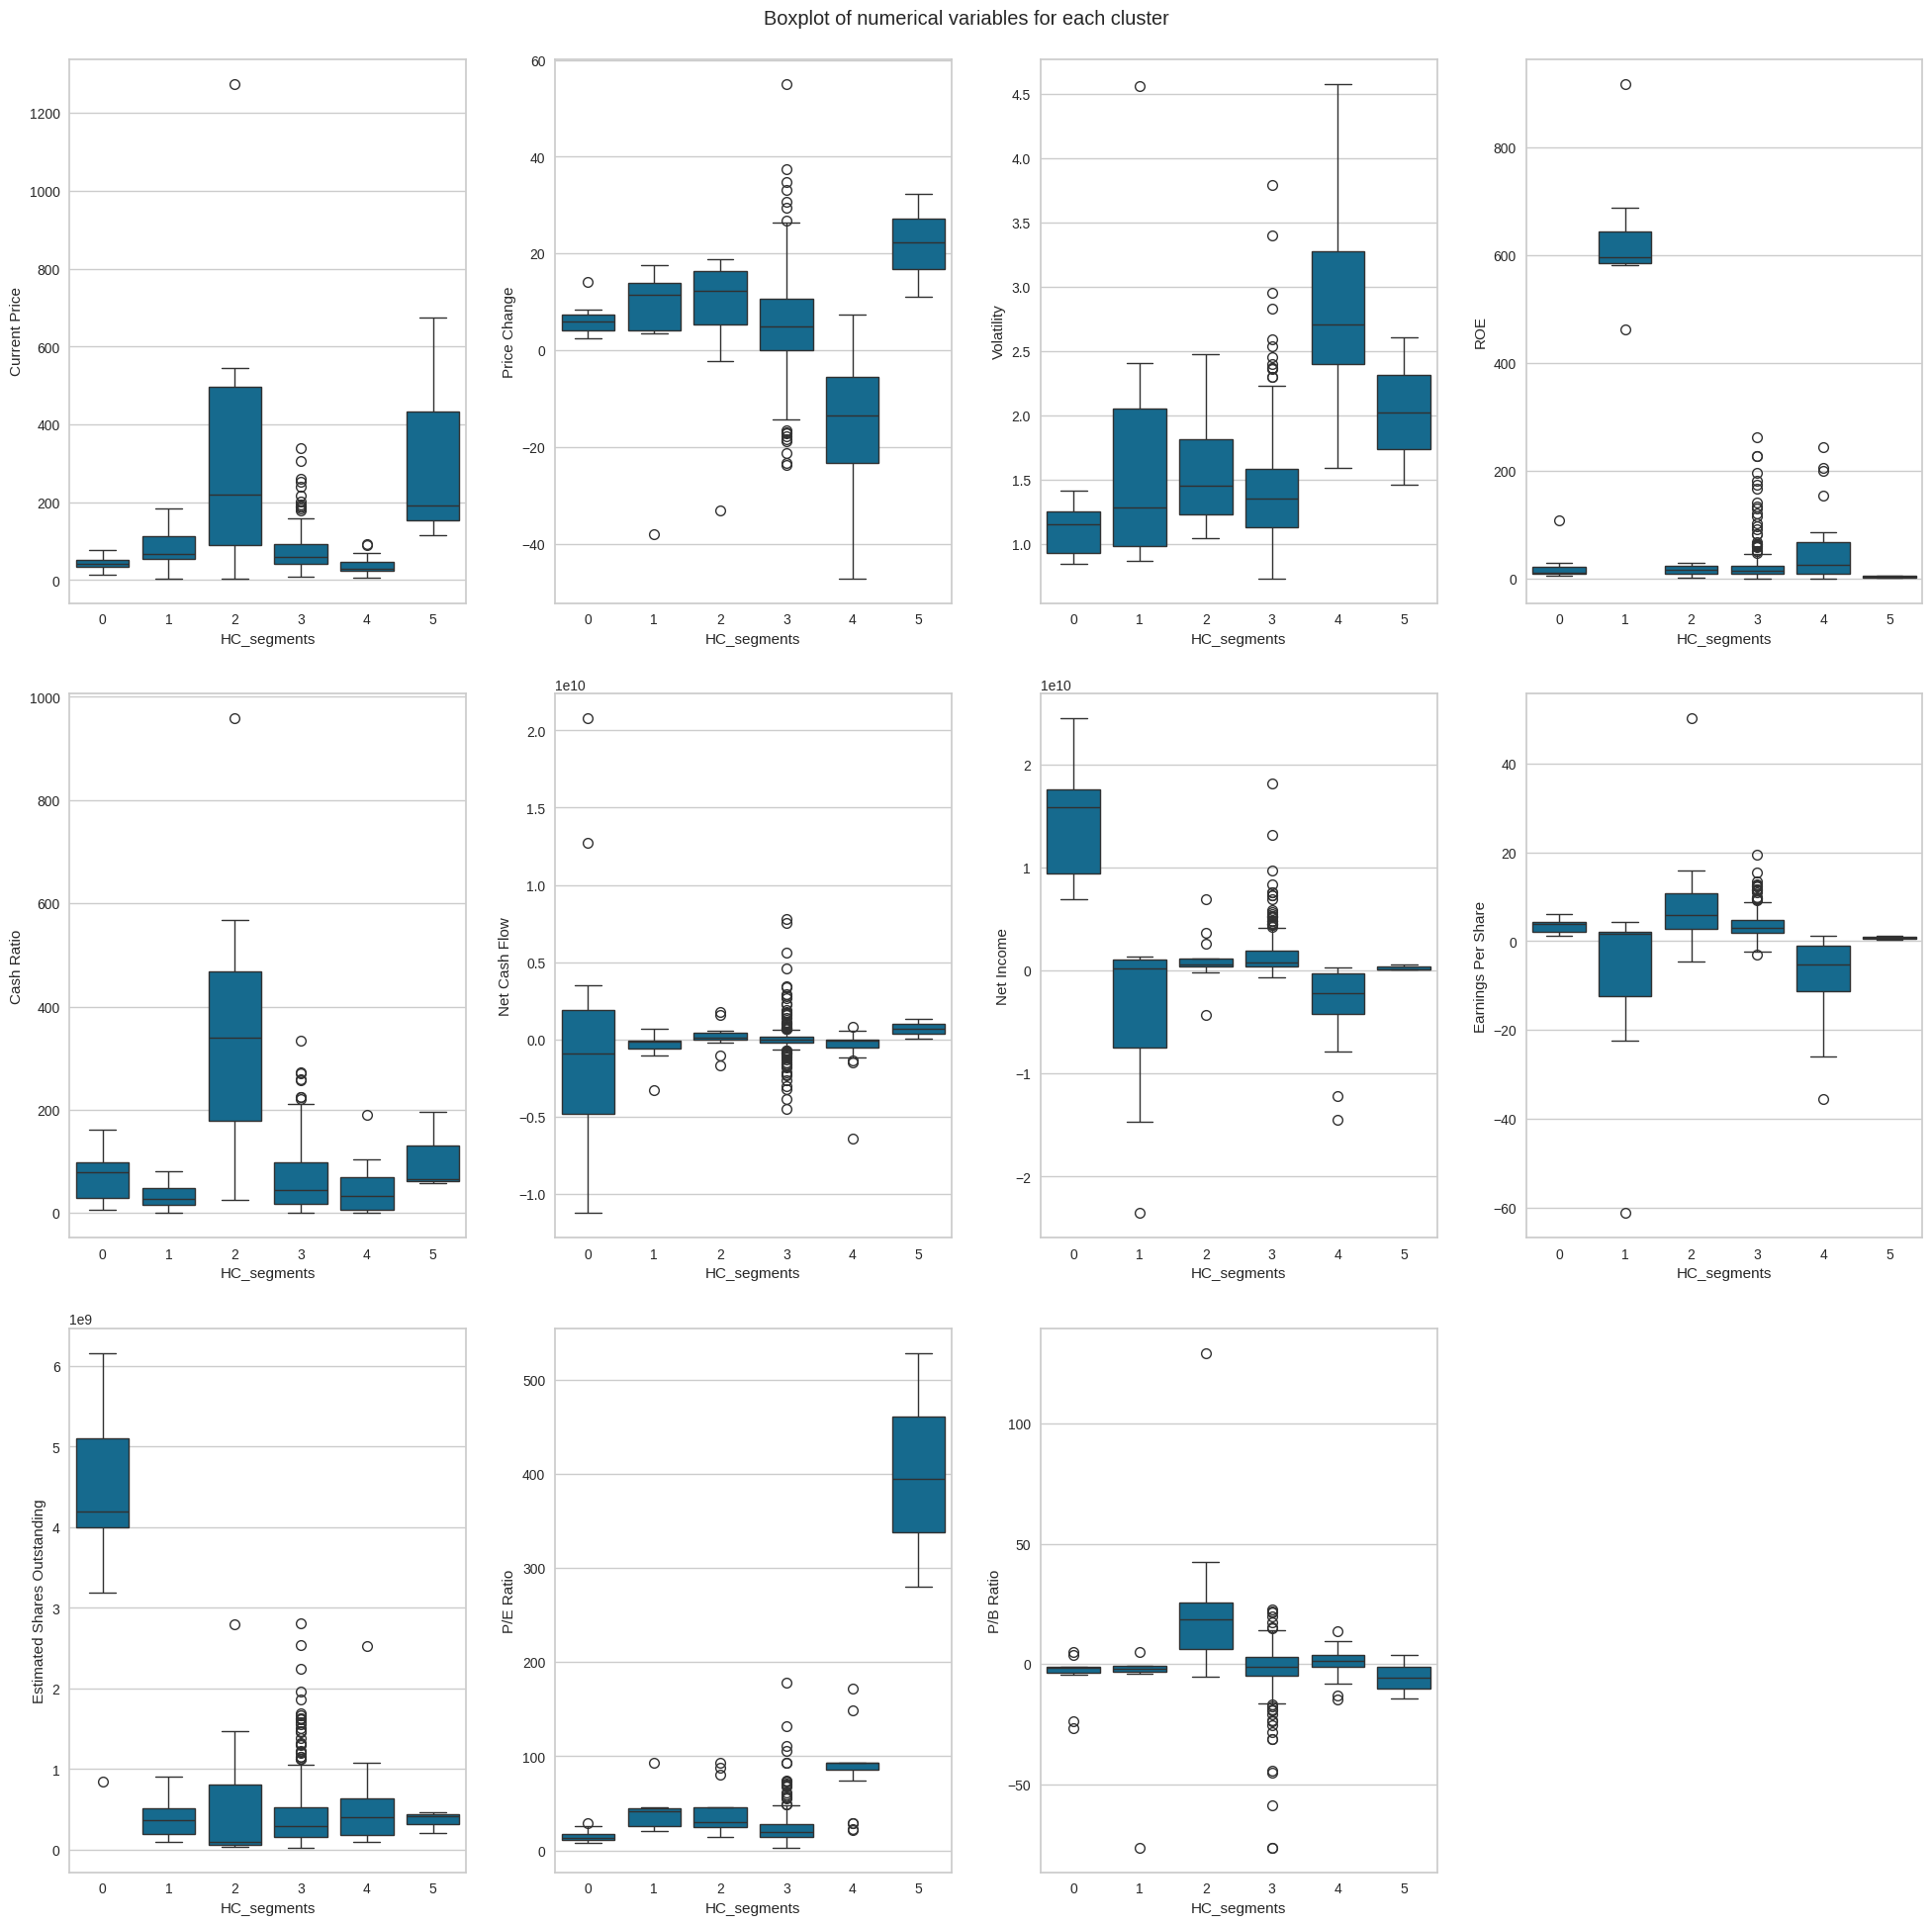

In [52]:
# Visualize the boxplot of numerical columns for each cluster
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Observations**

**Cluster 0**

*   The Current Price is low and the median value is less than 50 dollars in this cluster.
*   The Price change is low and the median value is less than 10% meaning there isn't much change in price of the stocks in this cluster.
*   The Volatility is very low and hence this cluster has companies with stock price which are not fluctuating over the 13 weeks timeframe.
*   The ROE is ver low.
*   The Cash ratio is moderate in this cluster.
*   The Net Cash Flow is low in this cluster with median value less than zero which means the cash outflow is more than the cash inflow.
*   The Net Income is higher in this cluster.
*   The median value of the Earnings per share is more than 10 dollars.
*   The Estimated Shares outstanding is higher in this cluster.
*   The P/E and P/B ratio is low.

**Cluster 1**

*   The Current Price is low.
*   The Price change is moderate in this cluster.
*   The Volatility is in the range of 1 to 2.5 dollars hence it is low to moderate.
*   The ROE is high in this cluster.
*   The Cash ratio is low and close to zero.
*   The median Net Cash Flow is zero meaning the cash inflow and outflow of 50% of the comapnies in this cluster are same.
*   The Net Income is low and the median value is in the negative range in this cluster.
*   The Earnings per share is negative range and very low.
*   The Estimated shares outstanding is low in this cluster.
*   The P/E ratio is low to moderate. The P/B ratio is very low.

**Cluster 2**

*   The median current price is less than 200 dollars and it is moderate to high.
*   The Price change attribute is almost similar to Cluster 1.
*   The Volatility is moderate in this cluster.
*   The ROE is low.
*   The Cash ratio is high in this cluster.
*   The Net Cash Flow is close to zero and is similar to cluster 1.
*   The Net Income is low.
*   The Earnings per share is high in this cluster
*   The median value of the estimated shares outstanding is lower than all the other clusters.
*   The P/E ratio is low and is sililar to cluster 1.
*   The P/B ratio is high in this cluster.


**Cluster 3**

*   The current price is slightly better than the low range.
*   The median value of the Price change is second lowest among all the clusters.
*   The Volatility is moderate.
*   The ROE is low.
*   The cash ratio is low to moderate.
*   The Net Cash Flow is low and some of the values are negative.
*   The Net Income is moderate.
*   The Earnings per share is slightly better than the low range.
*   The Estimated shares outstanding is moderate.
*   The P/E ratio and P/B ratio is low to moderate.


**Cluster 4**

*   The Current price of the cluster 4 is similar to cluster 0 and is very low.
*   The Price change is very low compared to all the cluster and it is in the negative range. Hence the companies in this cluster have performed poorly in the 13 weeks timeframe.
*   The Volatility is high in this cluster.
*   The ROE is moderate.
*   The cash ratio, Net cash flow, Net income, the Earnings per share are all low in this cluster.
*   The Estimated shares outstanding is moderate.
*   The P/E ratio is moderate.
*   The P/E ratio is low.

**Cluster 5**

*   The current price is high.
*   The Price change is moderate to high.
*   The Volatility is moderate to high.
*   The ROE is low.
*   The cash ratio is slightly better than the low range.
*   The Net Cash Flow, Net Income and Earnings per share are low in this cluster.
*   The Estimated shares outstanding is very low.
*   The P/E ratio is very high.
*   The P/B ratio is low.






























































## K-means vs Hierarchical Clustering

**Conclusion**

*   The Silhouette score of K-Means gave a clear idea on choosing the good number of clusters than the Elbow plot.
*   The K-Means clustering algorithm took less time for execution than the Hierarchical Clustering. The difference in execution time is not very significantly high as the number of datapoints is low.
*   The Hierarchical clustering algorithm with ward linkage and Euclidean distance measure gave more distinct clusters and it was clear enough to segment to proceed with the insights.
*   The Cluster 0 of the K-Means clustering algorithm and the Cluster 3 of the Hierarchical clustering algorithm are very similar in nature. K-Means yielding 277 observations in cluster 0 and Hierarchical clustering algorithm yielding 285 observations in cluster 3 which are of similar characterisitcs.
*   The appropriate number of clusters obtained from K-Means is 4.
*   The appropriate number of clusters obtained from Hierarchical clustering is 6.








## Actionable Insights and Recommendations

The following are the insights and recommendations for the Trade & Ahead Financial firm.

*   The companies in Cluster 0 is good in terms of Net Income, Earnings per share and Estimated shares outstanding. The Volatility and the price change is also low. Hence new investors can target these companies as the current price is also low and the risk factor in investing is moderately low.
*   The companies in cluster 1 has very high ROE but the Net Income, Earnings per share are all low. Hence Investors need to gauge the attributes other than the ROE to invest in these companies.
*   The companies in Cluster 2 are good investment strategy companies for investors who tend to buy high value stocks and it is good in terms of price change and volatility as well.
*   All the attributes in the cluster 3 companies are in the moderate range meaning investors who tend to take no risk at all can invest in these companies as the fluctuation of all the attributes are moderately less than other clusters.
*   The Cluster 4 and Cluster 5 companies are performing poorly in terms of Volatility, P/E ratio, Net Income, Earnings per share etc. These companies are poor Investing strategy based on the data of the 13 weeks timeframe. The one factor the investors can take risk about is the current price is low in cluster 4. Hence first time investors can take less risk in buying some low priced stocks.






